In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from math import ceil
from datetime import datetime, timedelta

In [3]:
df = pd.read_csv('dataset_mood_smartphone.csv')
print(len(df))
df['time'] = pd.to_datetime(df['time'])

376912


In [4]:
participants = df['id'].unique()
print(participants)
print(len(participants))

['AS14.01' 'AS14.02' 'AS14.03' 'AS14.05' 'AS14.06' 'AS14.07' 'AS14.08'
 'AS14.09' 'AS14.12' 'AS14.13' 'AS14.14' 'AS14.15' 'AS14.16' 'AS14.17'
 'AS14.19' 'AS14.20' 'AS14.23' 'AS14.24' 'AS14.25' 'AS14.26' 'AS14.27'
 'AS14.28' 'AS14.29' 'AS14.30' 'AS14.31' 'AS14.32' 'AS14.33']
27


In [5]:
# Create the pivot table
pivot_table = df.pivot_table(index='id', columns='variable', values='value', aggfunc='count', fill_value=0)

# Display the first few rows of the pivot table to check
print(pivot_table.head(27))

variable  activity  appCat.builtin  appCat.communication  \
id                                                         
AS14.01       1056            6299                  5337   
AS14.02        687            4075                  2449   
AS14.03       1122             903                  2848   
AS14.05       1169            1031                  3800   
AS14.06        772             558                  3300   
AS14.07        952            3753                  5050   
AS14.08       1159             633                  1689   
AS14.09        659             368                  1783   
AS14.12        932            7233                  1188   
AS14.13        544            1743                  7790   
AS14.14        977            3444                  1061   
AS14.15        191             724                   303   
AS14.16        443            1153                   468   
AS14.17       1077            3608                  3200   
AS14.19       1071            3047      

In [6]:
variables = df['variable'].unique()
participants = df['id'].unique()

for participant in participants:
    print(f'ID: {participant}')
    participant_df = df[df['id'] == participant] 
    value_counts_participant = participant_df['variable'].value_counts()
    print(value_counts_participant)
    print('')



ID: AS14.01
appCat.builtin          6299
screen                  5438
appCat.communication    5337
appCat.social           1097
activity                1056
appCat.entertainment     609
appCat.utilities         518
appCat.other             327
appCat.finance           275
circumplex.valence       223
circumplex.arousal       223
mood                     222
call                     151
appCat.travel            135
sms                       39
appCat.office             23
appCat.unknown            14
appCat.game               12
appCat.weather             1
Name: variable, dtype: int64

ID: AS14.02
screen                  4838
appCat.builtin          4075
appCat.communication    2449
activity                 687
appCat.social            561
call                     451
appCat.entertainment     418
appCat.travel            303
appCat.other             213
mood                     159
circumplex.arousal       159
circumplex.valence       159
sms                       81
appCat.utilities  

In [7]:
# df_na = df[df['value'] == 'NA']
df_na = df[pd.isna(df['value'])]
print(df_na)
df_na_variables = df_na['variable'].value_counts()
print(df_na_variables)

       Unnamed: 0       id                time            variable  value
5708         5709  AS14.01 2014-04-02 18:00:00  circumplex.arousal    NaN
5730         5731  AS14.01 2014-04-07 15:00:00  circumplex.arousal    NaN
5772         5773  AS14.01 2014-04-16 12:00:00  circumplex.arousal    NaN
5796         5797  AS14.01 2014-04-21 13:00:00  circumplex.arousal    NaN
5835         5836  AS14.01 2014-04-29 09:00:00  circumplex.arousal    NaN
...           ...      ...                 ...                 ...    ...
16858       16859  AS14.33 2014-05-16 20:00:00  circumplex.valence    NaN
16861       16862  AS14.33 2014-05-17 12:00:00  circumplex.valence    NaN
16881       16882  AS14.33 2014-05-21 16:00:00  circumplex.valence    NaN
16898       16899  AS14.33 2014-05-24 23:00:00  circumplex.valence    NaN
16902       16903  AS14.33 2014-05-25 21:00:00  circumplex.valence    NaN

[202 rows x 5 columns]
circumplex.valence    156
circumplex.arousal     46
Name: variable, dtype: int64


In [8]:
# Remove rows with value NA
df = df.dropna()
print(len(df))

376710


In [9]:
# Check whether there are any values out of range in mood
mood_values = df[df['variable'] == 'mood']['value']

# Convert mood_values to numeric
mood_values_numeric = pd.to_numeric(mood_values, errors='coerce')

filtered_mood_values = mood_values_numeric[(mood_values_numeric < 0) | (mood_values_numeric > 10)]

# all good
print(filtered_mood_values)   

Series([], Name: value, dtype: float64)


In [10]:
# Check whether there are any values out of range in circumplex.arousal
circ_arous_values = df[df['variable'] == 'circumplex.arousal']['value']

# Convert mood_values to numeric
circ_arous_values_numeric = pd.to_numeric(circ_arous_values, errors='coerce')

filtered_circ_arous_values = circ_arous_values_numeric[(circ_arous_values_numeric < -2) | (circ_arous_values_numeric > 2)]

# all good
print(filtered_circ_arous_values)

Series([], Name: value, dtype: float64)


In [11]:
# Check whether there are any values out of range in circumplex.arousal
circ_val_values = df[df['variable'] == 'circumplex.valence']['value']

# Convert mood_values to numeric
circ_val_values_numeric = pd.to_numeric(circ_val_values, errors='coerce')

filtered_circ_val_values = circ_val_values_numeric[(circ_val_values_numeric < -2) | (circ_val_values_numeric > 2)]

# all good
print(filtered_circ_val_values)

Series([], Name: value, dtype: float64)


In [12]:
# Check whether there are any values out of range in circumplex.arousal
activity_values = df[df['variable'] == 'activity']['value']

# Convert mood_values to numeric
activity_values_numeric = pd.to_numeric(activity_values, errors='coerce')

filtered_activity_values = activity_values_numeric[(activity_values_numeric < 0) | (activity_values_numeric > 1)]

# all good
print(filtered_activity_values)

Series([], Name: value, dtype: float64)


In [13]:
# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Extract just the date part
df['date'] = df['time'].dt.date

# Count the number of unique dates
unique_days_count = df['date'].nunique()

print(f'Count unique days in dataset: {unique_days_count}')

Count unique days in dataset: 113


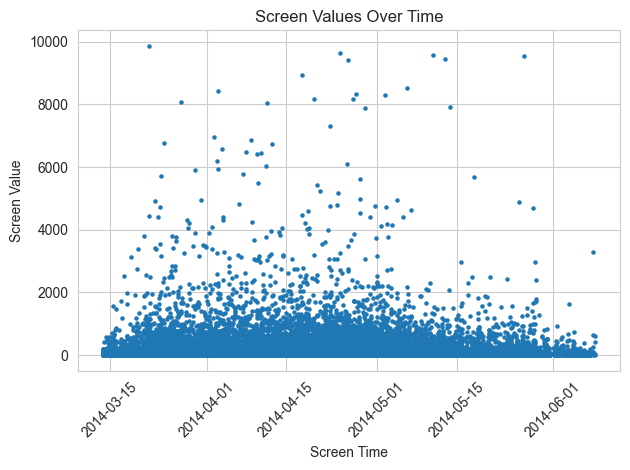

In [14]:
# Screen values
screen_values = df[df['variable'] == 'screen']['value']
screen_times = df[df['variable'] == 'screen']['time']

# Filter to get screen values and times
screen_values = df[df['variable'] == 'screen']['value']

plt.figure()
plt.scatter(screen_times, screen_values, s=5)
plt.title('Screen Values Over Time')
plt.xlabel('Screen Time')
plt.ylabel('Screen Value')

plt.xticks(rotation=45)
plt.tight_layout()

In [15]:
"""
DETECTING OUTLIERS IN 'SCREEN'

This piece of code detects outliers for the full dataset. But I think it would not be right to delete all of them, because these screentimes are recorded automatically, implying there can't be any errors in entering the data. Therefore all the screentimes should in this sense be 'correct'. The only reason they could not be representable is that a participant forgot to lock their screen. These we should maybe delete, but then we would have to detect for outliers within each participant. 
"""

# Calculate IQR
Q1 = screen_values.quantile(0.25)
Q3 = screen_values.quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = screen_values[(screen_values < lower_bound) | (screen_values > upper_bound)]

print("Outliers based on IQR method:")
print(outliers)
print(len(outliers))

Outliers based on IQR method:
39895     483.510
39896     812.907
39899     201.687
39900     648.997
39904     374.379
           ...   
136459    216.134
136466    164.072
136467    504.017
136468    526.137
136469    847.779
Name: value, Length: 10055, dtype: float64
10055


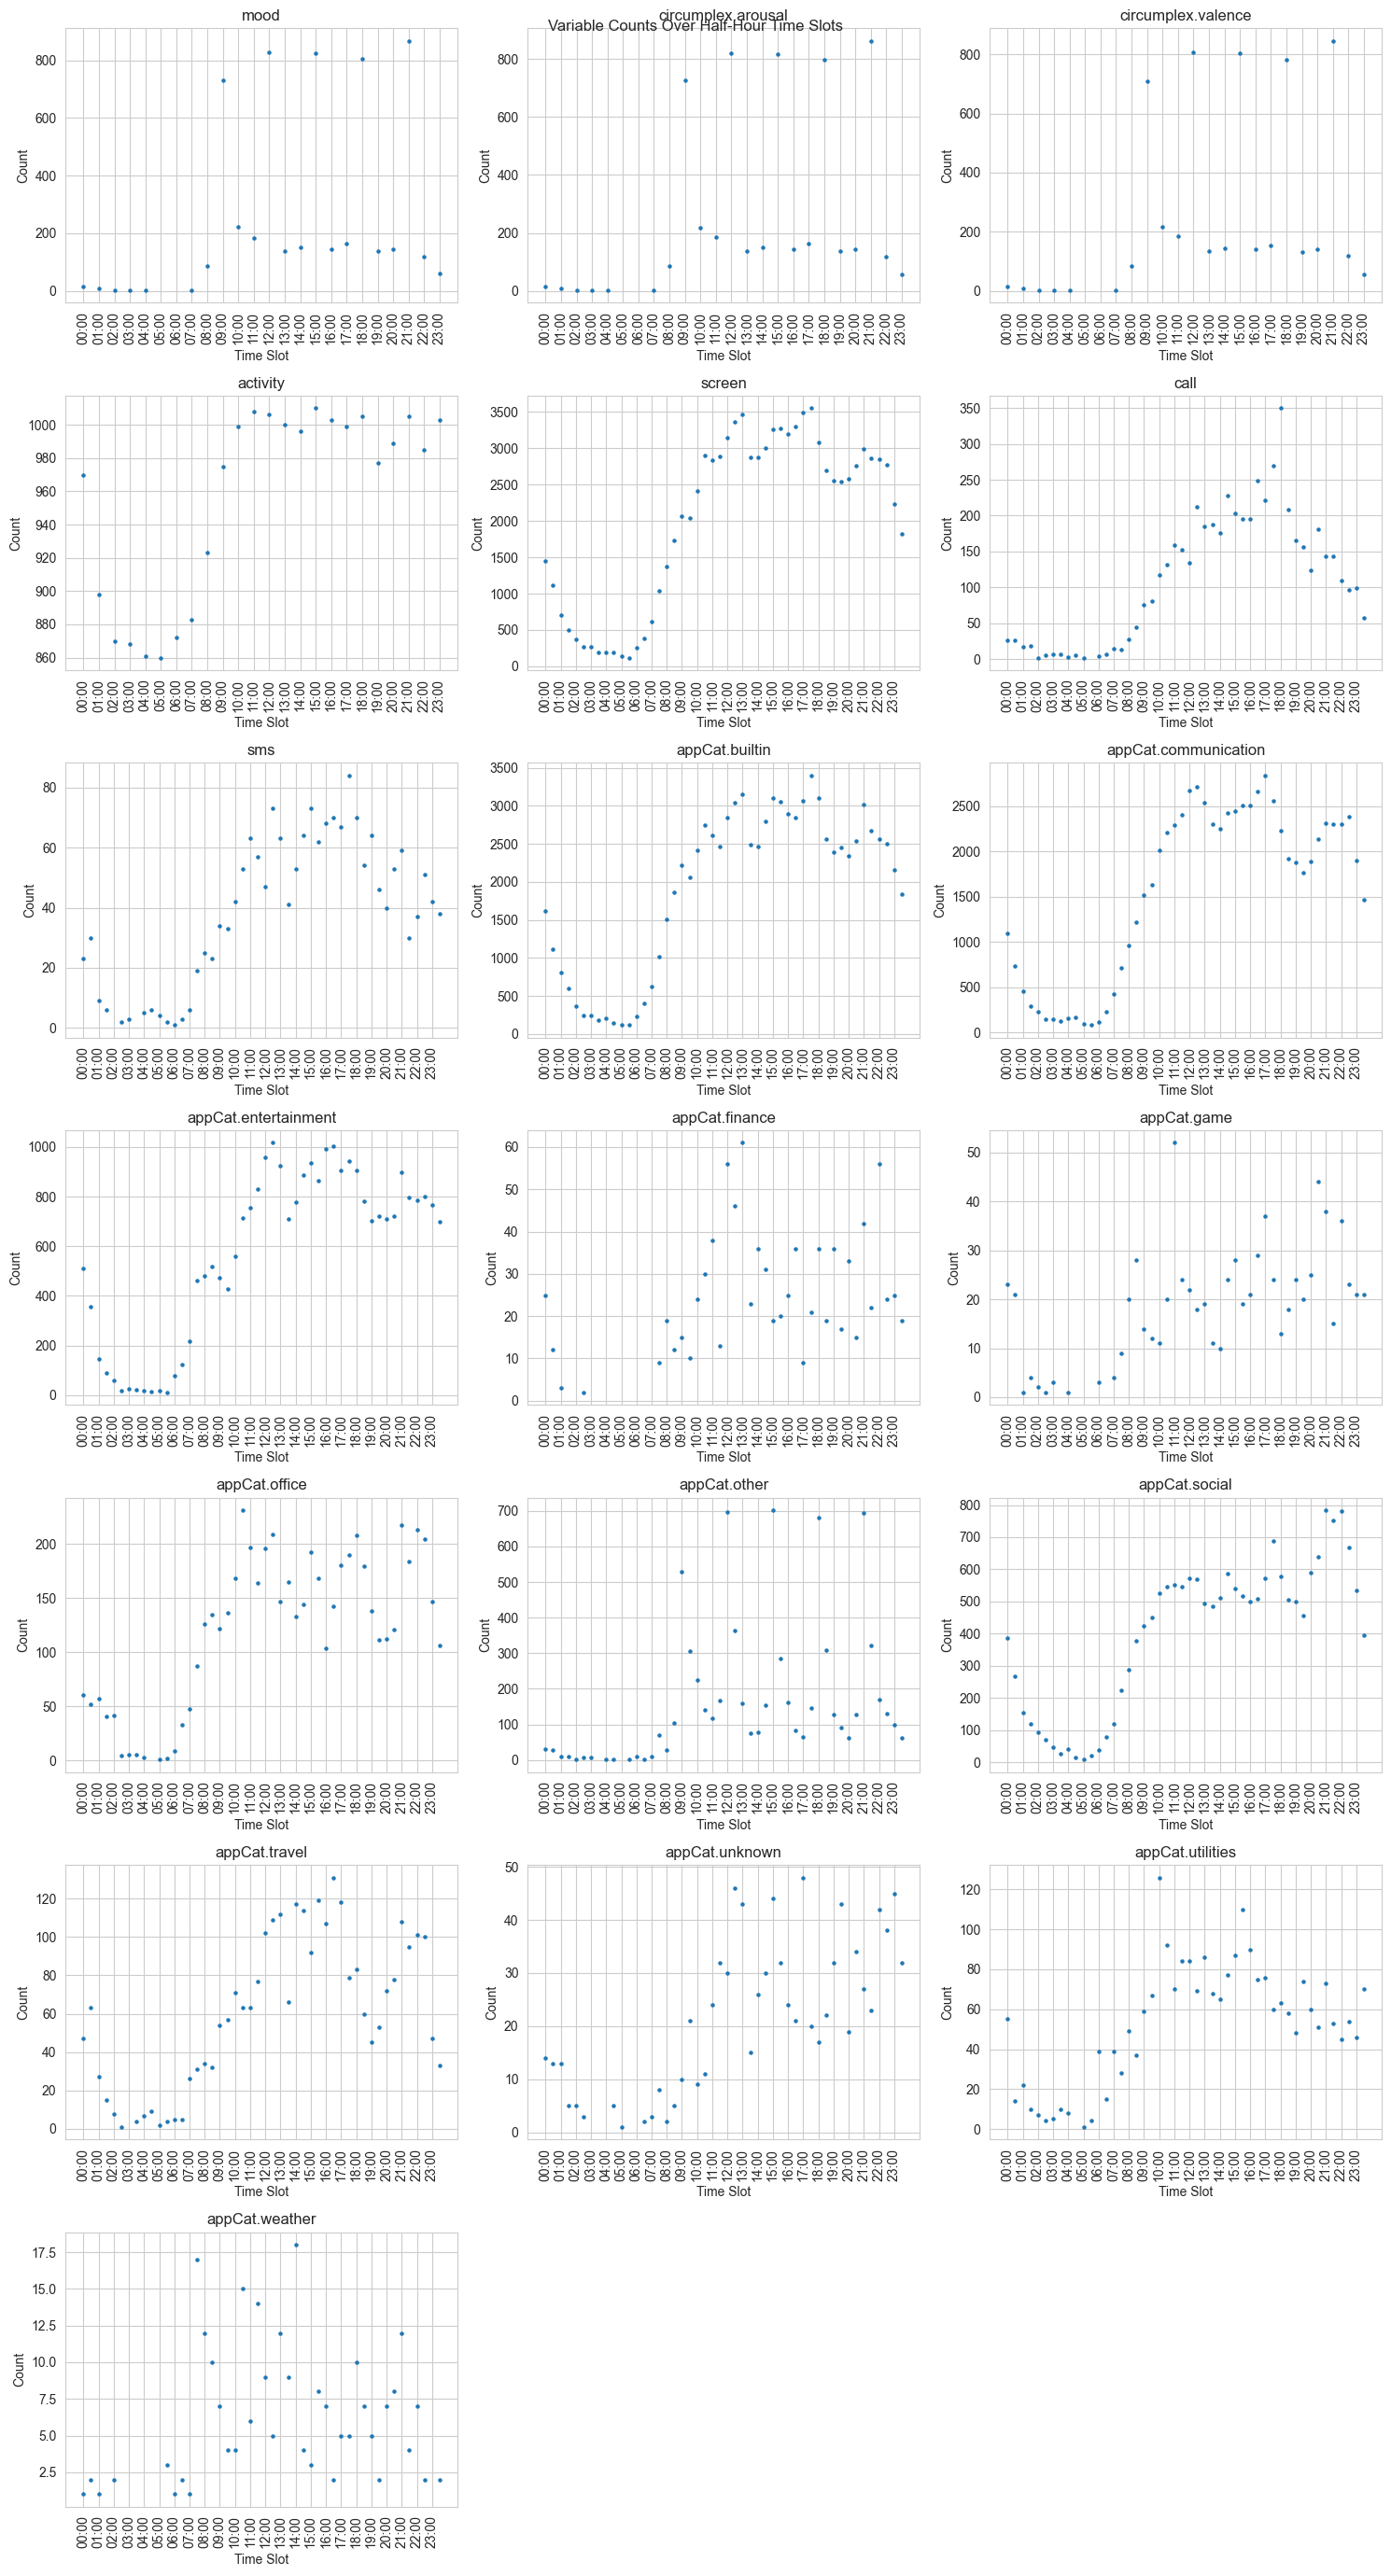

In [16]:
# import matplotlib.pyplot as plt
# import pandas as pd
# from datetime import time
# from math import ceil

# Assuming df is your DataFrame and 'time' is the datetime column
# df['time'] = pd.to_datetime(df['time'])

# Function to map the datetime to a numerical index representing half-hour slots
def map_to_half_hour_index(t):
    return t.hour * 2 + (1 if t.minute >= 30 else 0)

# Apply the function to map to half-hour indices
df['time_slot_index'] = df['time'].apply(map_to_half_hour_index)

# Group by time slot index and variable, then count the datapoints
time_slot_counts = df.groupby(['time_slot_index', 'variable']).size().reset_index(name='counts')

# Determine the grid size
unique_variables = df['variable'].unique()
n_variables = len(unique_variables)
n_cols = 3  # Adjust as needed
n_rows = ceil(n_variables / n_cols)

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Variable Counts Over Half-Hour Time Slots')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

# Prepare x-axis labels for half-hour slots
x_labels = [f"{hour:02d}:{minute:02d}" for hour in range(24) for minute in [0, 30]]
x_ticks = list(range(48))  # 24 hours * 2 slots per hour

for i, variable in enumerate(unique_variables):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current variable
    variable_data = time_slot_counts[time_slot_counts['variable'] == variable]
    
    # Plot the data on the current axis
    ax.scatter(variable_data['time_slot_index'], variable_data['counts'], s=5)
    
    # Set x-axis labels
    ax.set_xticks(x_ticks[::2])  # Label every other slot to prevent crowding
    ax.set_xticklabels(x_labels[::2], rotation=90)  # Rotate labels for better fit
    
    ax.set_title(variable)
    ax.set_xlabel('Time Slot')
    ax.set_ylabel('Count')

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


In [38]:
"""
DETECTING OUTLIERS IN 'SCREEN' BY PARTICIPANT
"""

# Function to detect outliers within a group
def detect_outliers(group):
    Q1 = group['value'].quantile(0.25)
    Q3 = group['value'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return only outliers within the group
    return group[(group['value'] < lower_bound) | (group['value'] > upper_bound)]

# Group by participant and apply the outlier detection
outliers_by_variable_df = df.groupby('variable').apply(detect_outliers).reset_index(drop=True)

print("Outliers detected within each variable:")
print(outliers_by_variable_df)

outliers_variable = outliers_by_variable_df.groupby('variable').count().reset_index(drop=True)
print(outliers_variable)

Outliers detected within each variable:
       Unnamed: 0       id                    time  variable       value  \
0           16943  AS14.01 2014-03-21 13:00:00.000  activity    0.316667   
1           16947  AS14.01 2014-03-21 17:00:00.000  activity    0.361345   
2           16956  AS14.01 2014-03-22 11:00:00.000  activity    0.341667   
3           16960  AS14.01 2014-03-22 15:00:00.000  activity    0.436975   
4           16981  AS14.01 2014-03-23 21:00:00.000  activity    0.313559   
...           ...      ...                     ...       ...         ...   
29186      136459  AS14.33 2014-05-30 20:59:08.757    screen  153.815000   
29187      136460  AS14.33 2014-05-30 21:17:40.377    screen  216.134000   
29188      136462  AS14.33 2014-05-30 21:21:58.575    screen  134.948000   
29189      136466  AS14.33 2014-05-30 21:34:32.516    screen  133.394000   
29190      136467  AS14.33 2014-05-30 21:38:25.263    screen  164.072000   

             date  time_slot_index         time

In [18]:
# Extract unique variables
unique_variables = df['variable'].unique()

# Find global min and max time values for the x-axis scale
global_time_min = df['time'].min()
global_time_max = df['time'].max()

In [19]:
"""
Removing negative time values
376710 data points before removing negative time values
376706 data points after removing negative time values

"""

def filter_variables(all_var, var_to_remove):
    var_to_keep = []
    for var in all_var:
        if var not in var_to_remove:
            var_to_keep.append(var)
    return var_to_keep

unique_variables = df['variable'].unique()
non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms']
time_variables = filter_variables(unique_variables, non_time_variables)

# Filter the DataFrame
neg_value_filter_time_df = df[(df['variable'].isin(time_variables)) & (df['value'] > 0)]
only_non_time_vars = df[(df['variable'].isin(non_time_variables))]

# Concatenate the filtered and unfiltered parts
df = pd.concat([neg_value_filter_time_df, only_non_time_vars], ignore_index=True)


In [20]:
# for variable in unique_variables:
#     # # appCat.builtin values
#     # app_builtin_values = df[df['variable'] == variable]['value']
#     # app_builtin_times = df[df['variable'] == variable]['time']
#     
#     plt.figure()
#     plt.scatter(df[df['variable'] == variable]['time'], df[df['variable'] == variable]['value'], s=5)
#     plt.title(f'{variable} Over Time')
#     plt.xlabel('Time')
#     plt.ylabel(f'{variable} Value')
#     
#     plt.xlim(global_time_min, global_time_max)
#     plt.xticks(rotation=45)
#     plt.tight_layout()

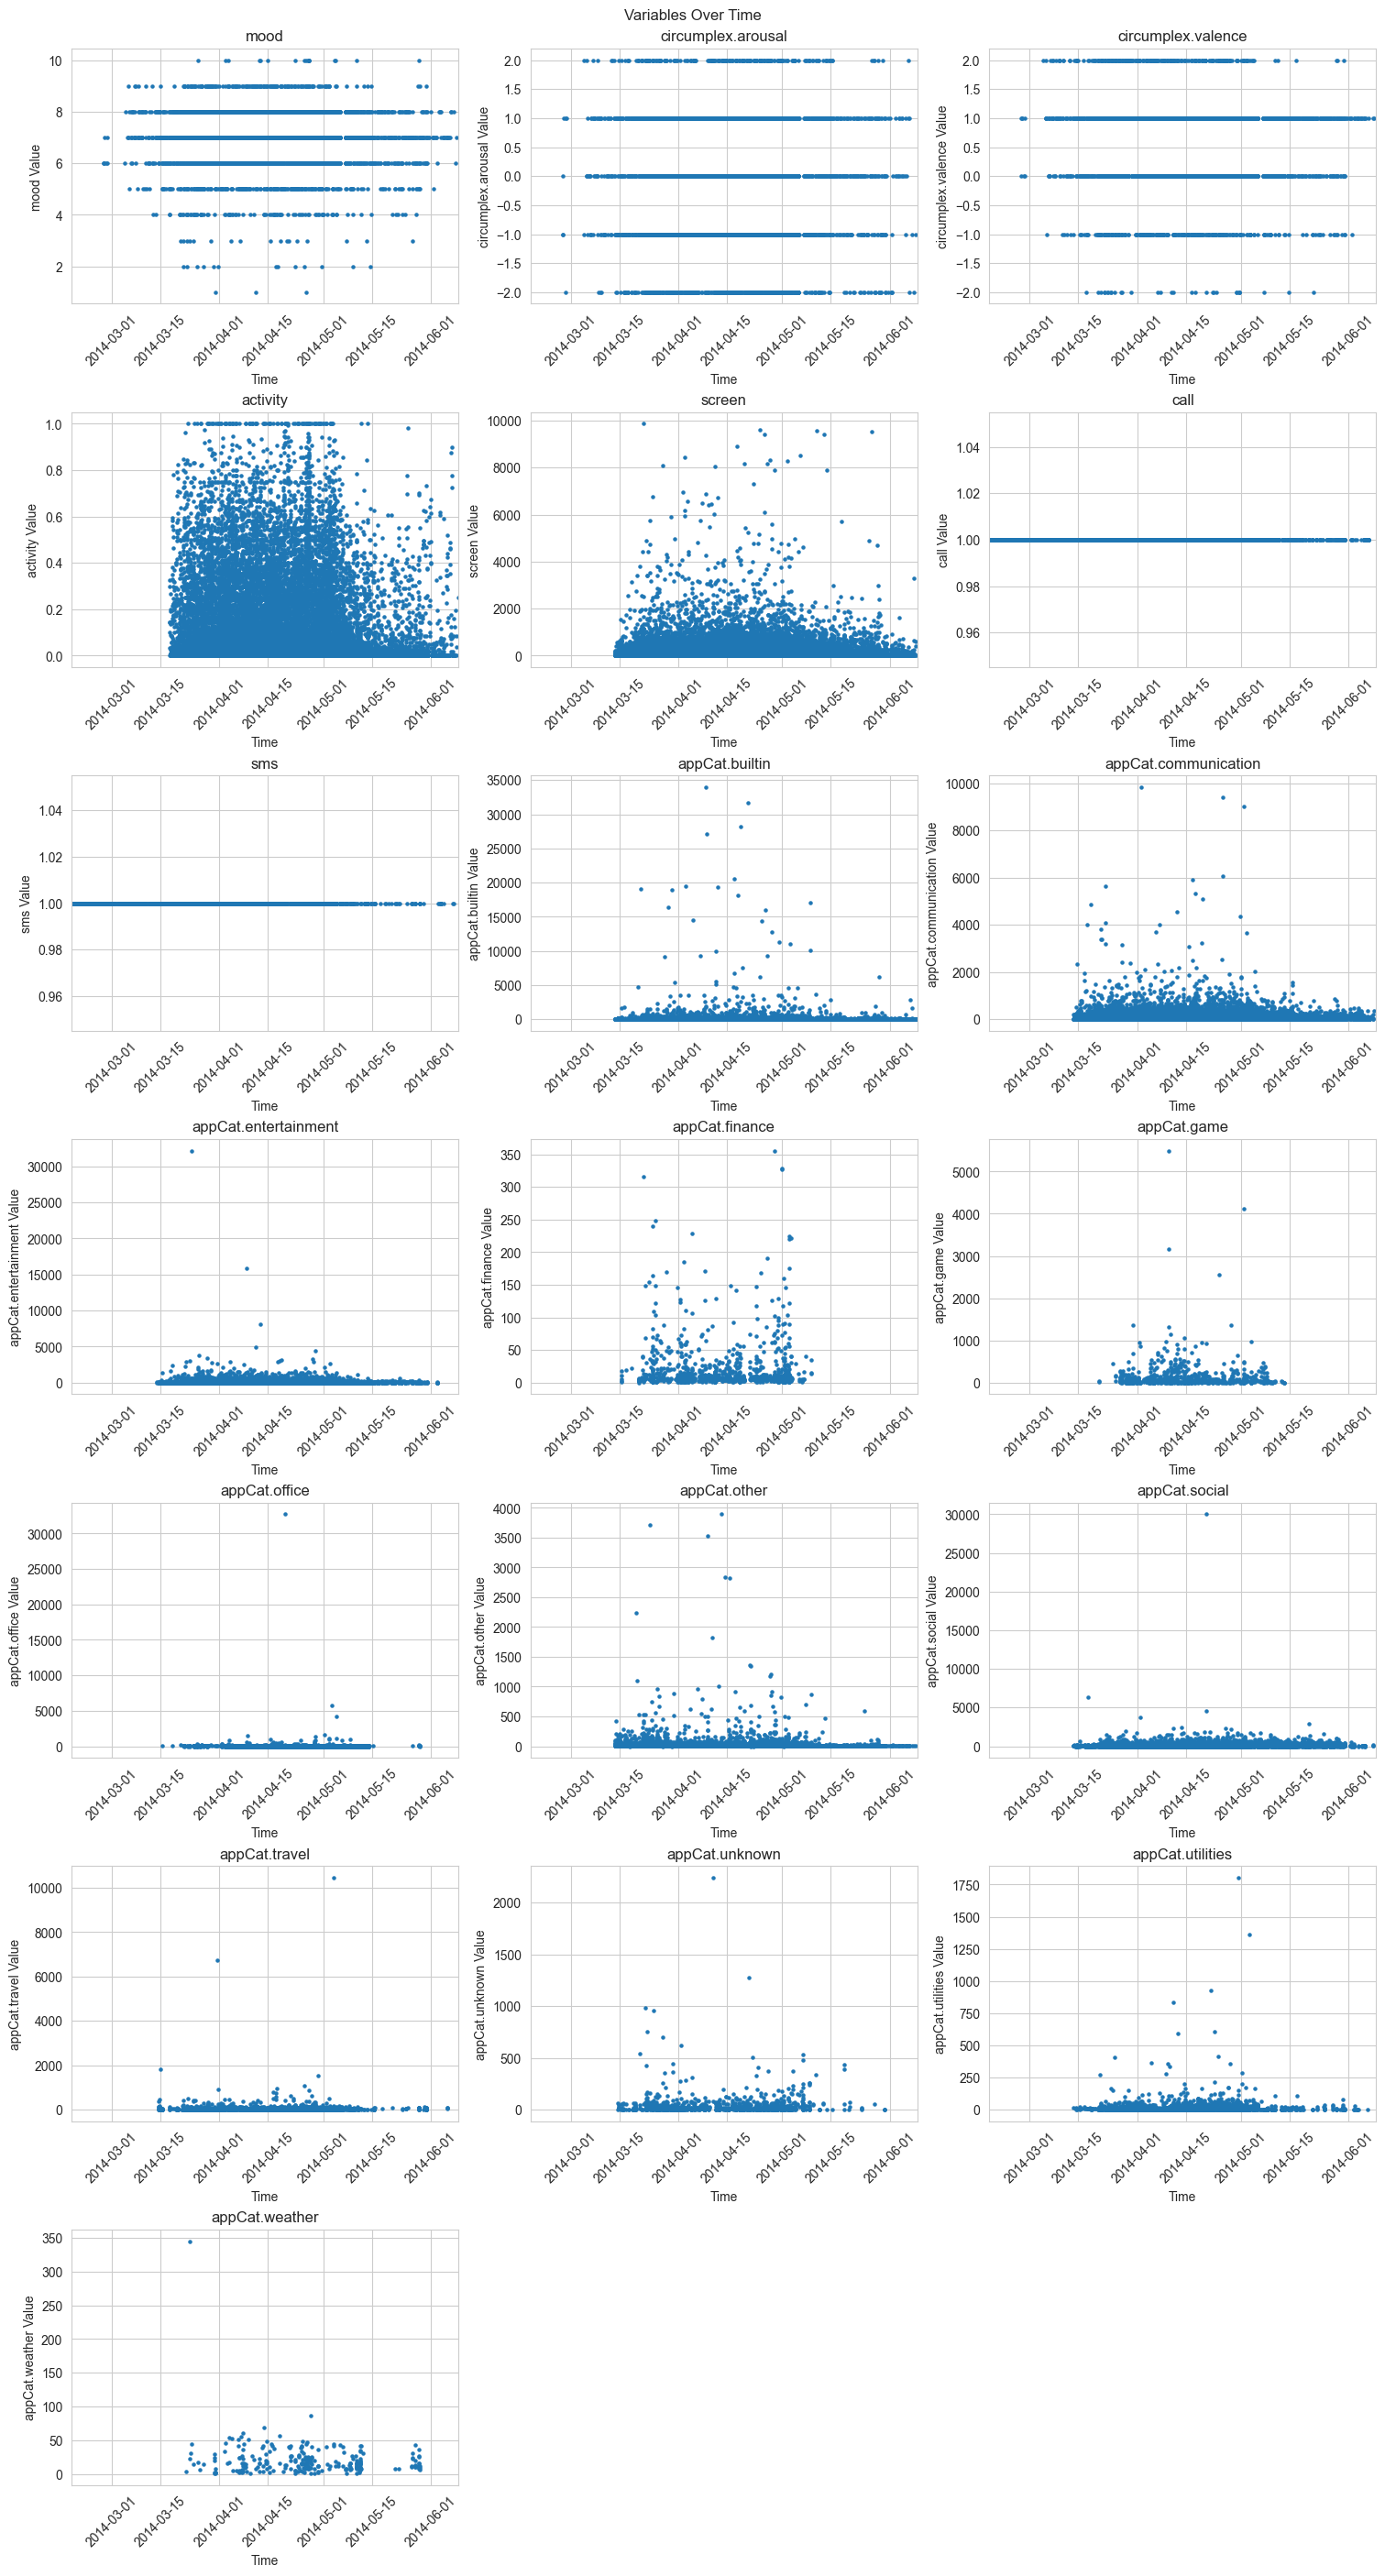

In [21]:
"""
Observations of the plots:
- Not all data is collected over the same time span. I don't know whether this is a problem. I also wonder whether this is because people did not use certain apps in certain periods of time, or whether it is because data collection was not happening in certain times. 
- Negative times are also observerd, which should not be possible. I wonder how this could come about as it cannot be a typo. Did the software register this in the wrong way?
- I dont really understand why for many plots the screen time in general seems to decline with time. We should probably figure that out, maybe it has something to do with a holiday.
- I want to check the values of call and sms because I dont think that they will add anything to the model. 
"""

# Determine the grid size
n_variables = len(unique_variables)
n_cols = 3  # for example, adjust as needed
n_rows = ceil(n_variables / n_cols)

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Variables Over Time')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, variable in enumerate(unique_variables):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current variable
    variable_data = df[df['variable'] == variable]
    
    # Plot the data on the current axis
    ax.scatter(variable_data['time'], variable_data['value'], s=5)
    ax.set_title(variable)
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{variable} Value')
    
    ax.set_xlim(global_time_min, global_time_max)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

plt.show()

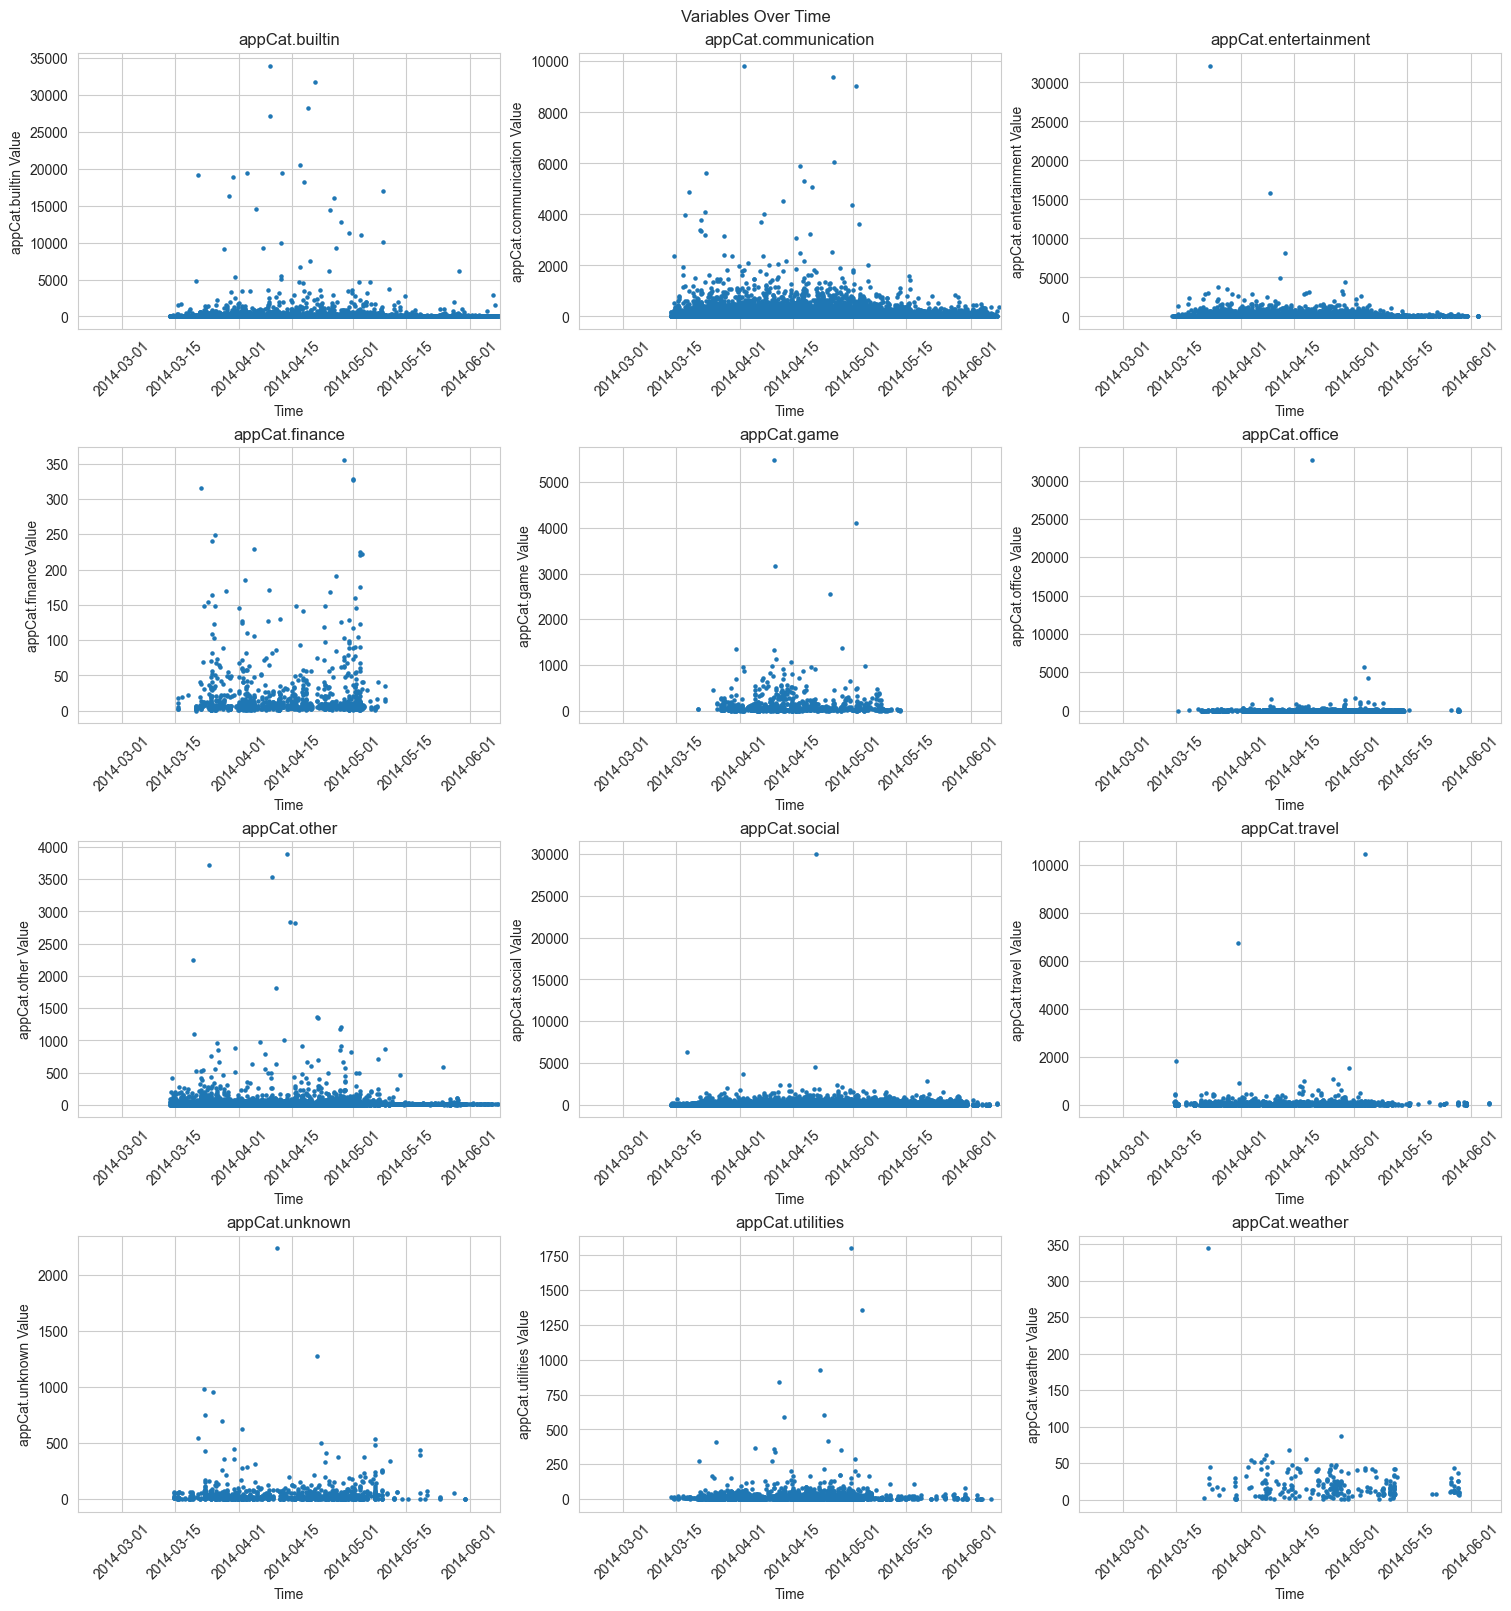

In [22]:
"""
Observations of the plots:
- Not all data is collected over the same time span. I don't know whether this is a problem. I also wonder whether this is because people did not use certain apps in certain periods of time, or whether it is because data collection was not happening in certain times. 
- Negative times are also observerd, which should not be possible. I wonder how this could come about as it cannot be a typo. Did the software register this in the wrong way?
- I dont really understand why for many plots the screen time in general seems to decline with time. We should probably figure that out, maybe it has something to do with a holiday.
- I want to check the values of call and sms because I dont think that they will add anything to the model. 
"""

# # Extract unique variables
# unique_variables = df['variable'].unique()
# non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'screen', 'call', 'sms']
# time_variables = filter_variables(unique_variables, non_time_variables)

# Determine the grid size
n_variables = len(time_variables)
n_cols = 3  # for example, adjust as needed
n_rows = ceil(n_variables / n_cols)

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Variables Over Time')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, variable in enumerate(time_variables):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current variable
    variable_data = df[df['variable'] == variable]
    
    # Plot the data on the current axis
    ax.scatter(variable_data['time'], variable_data['value'], s=5)
    ax.set_title(variable)
    ax.set_xlabel('Time')
    ax.set_ylabel(f'{variable} Value')
    
    ax.set_xlim(global_time_min, global_time_max)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

plt.show()

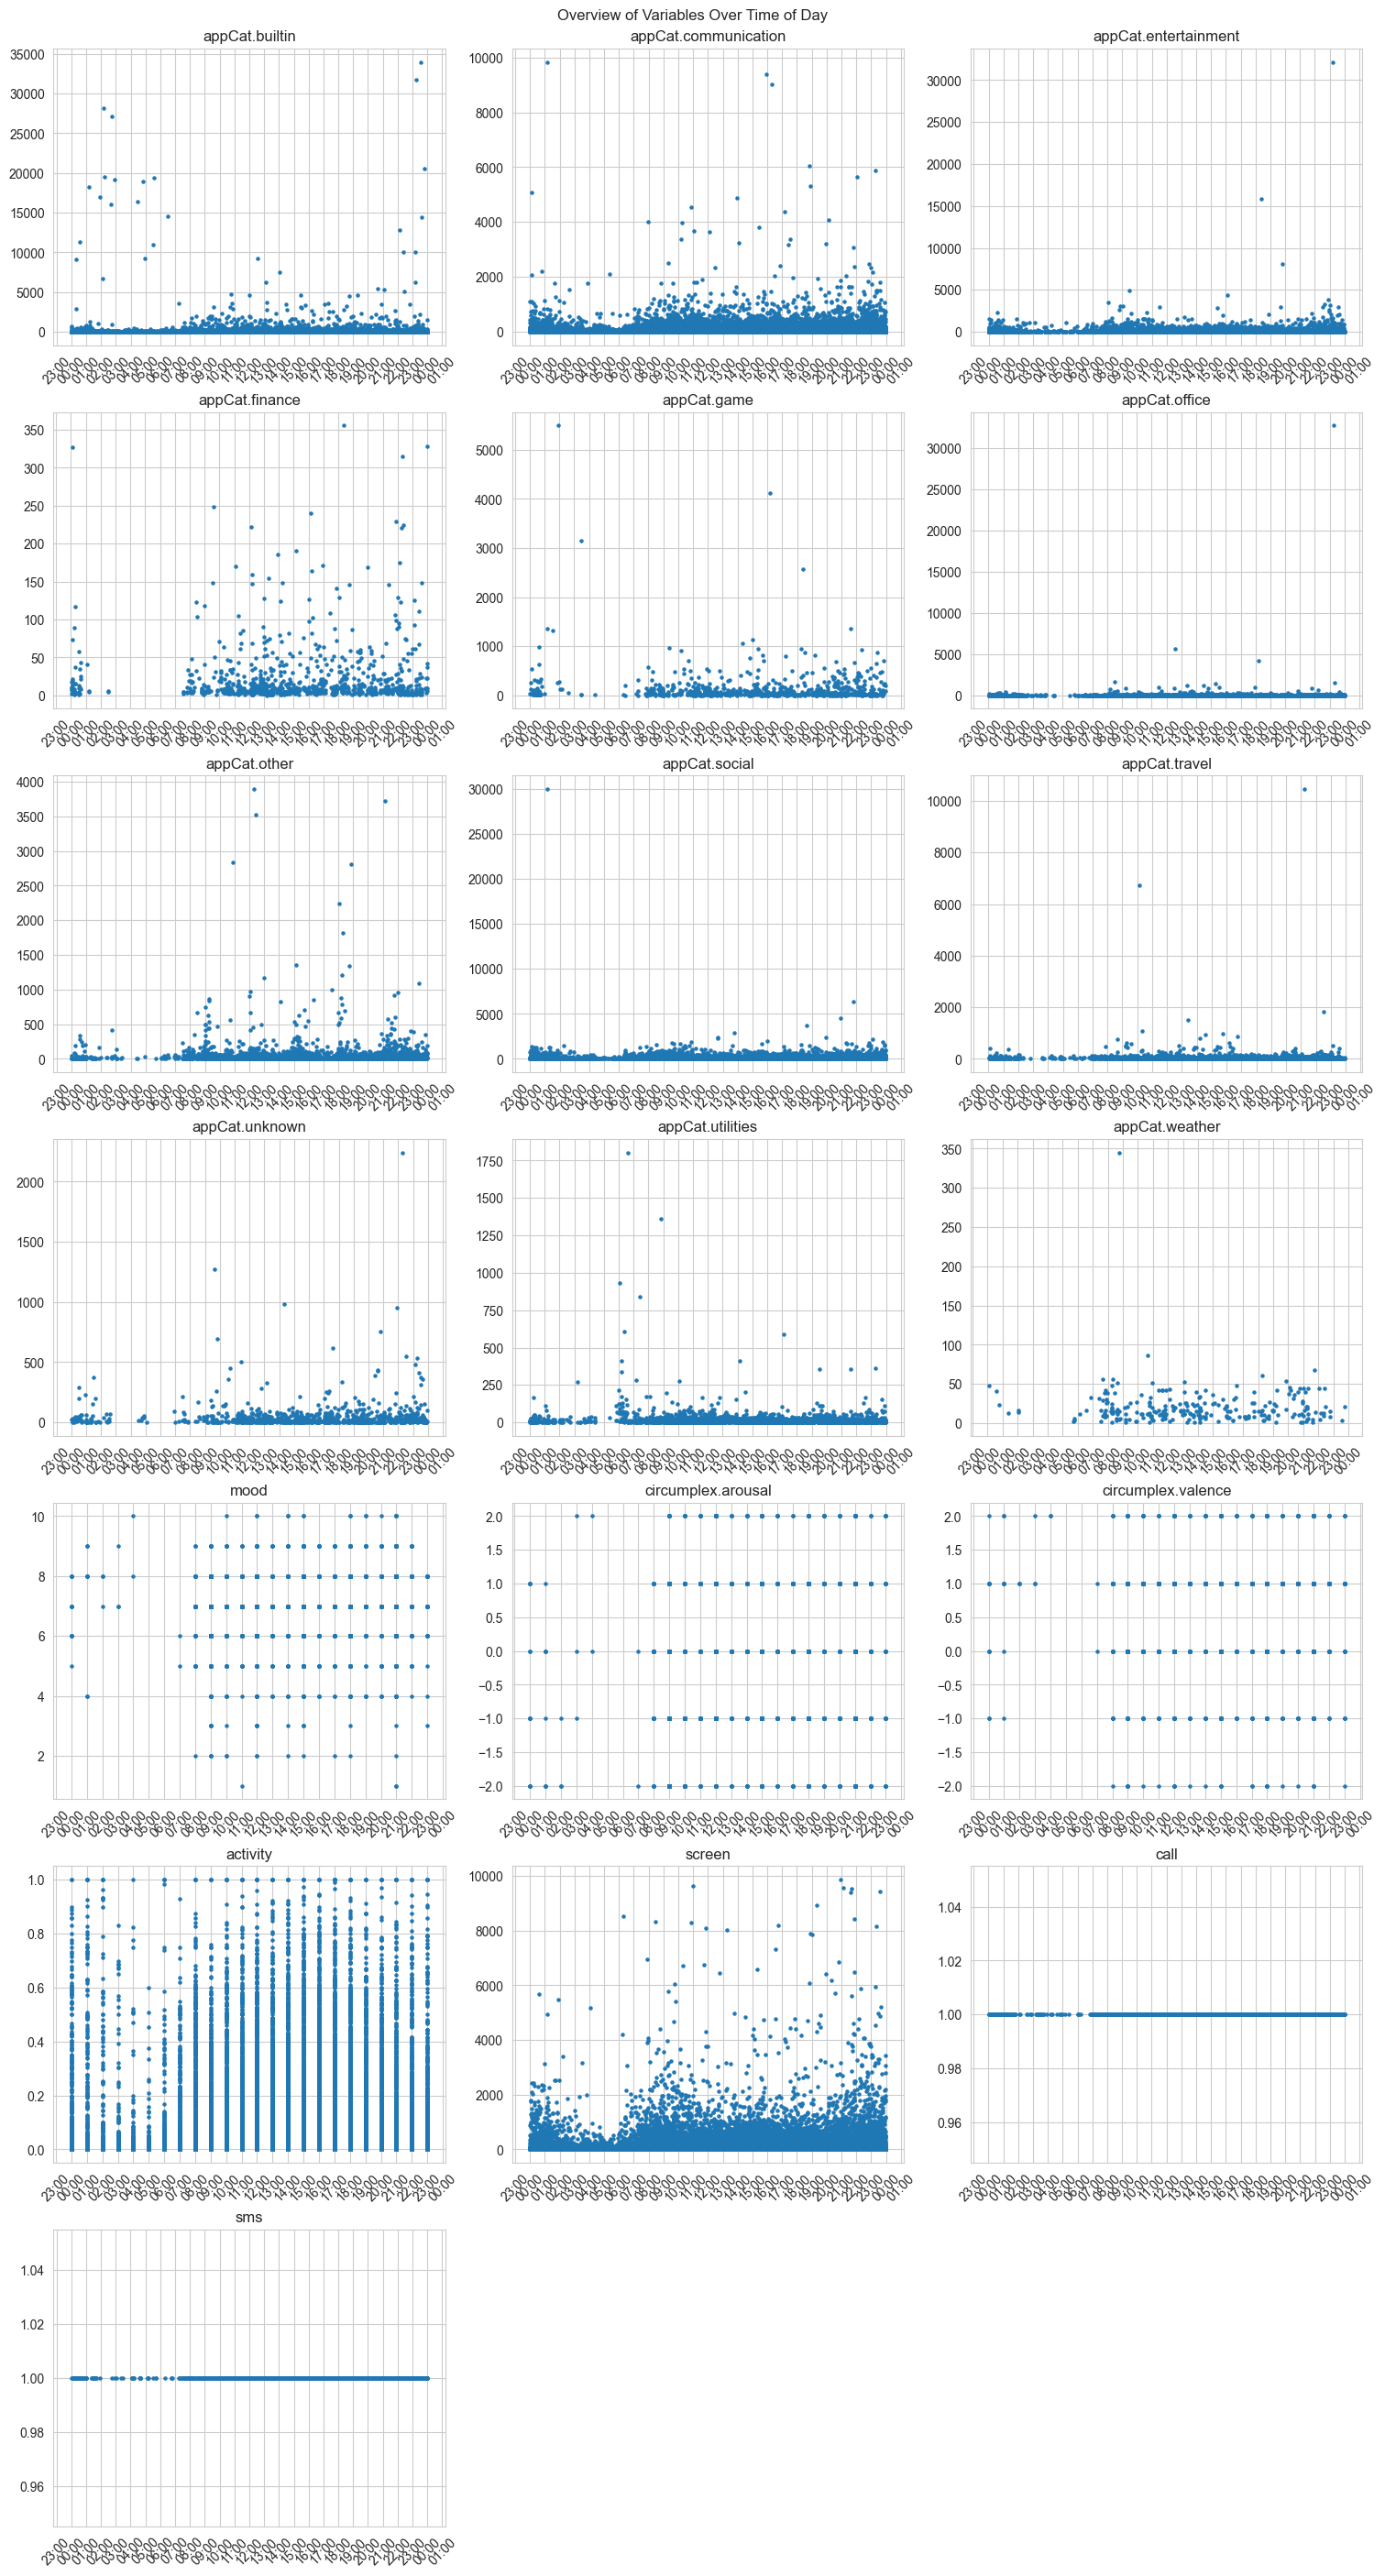

In [23]:
# Extract the time component, and set an arbitrary date for all times
df['time_of_day'] = df['time'].apply(lambda x: datetime(1900, 1, 1, x.hour, x.minute, x.second))

# Extract unique variables
unique_variables = df['variable'].unique()
n_variables = len(unique_variables)

# Determine grid size for subplots
n_cols = 3  # Adjust the number of columns as needed
n_rows = ceil(n_variables / n_cols)  # Calculate rows needed based on the number of variables

# Create a figure and a grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)
fig.suptitle('Overview of Variables Over Time of Day')

# Flatten the axs array for easier iteration if it's multidimensional
axs = axs.flatten()

for i, variable in enumerate(unique_variables):
    variable_data = df[df['variable'] == variable]
    # Plot on the ith subplot
    axs[i].scatter(variable_data['time_of_day'], variable_data['value'], s=5)
    axs[i].set_title(variable)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=1))
    axs[i].tick_params(axis='x', rotation=45)

# Hide any unused subplots
for ax in axs[n_variables:]:
    ax.set_visible(False)

plt.show()


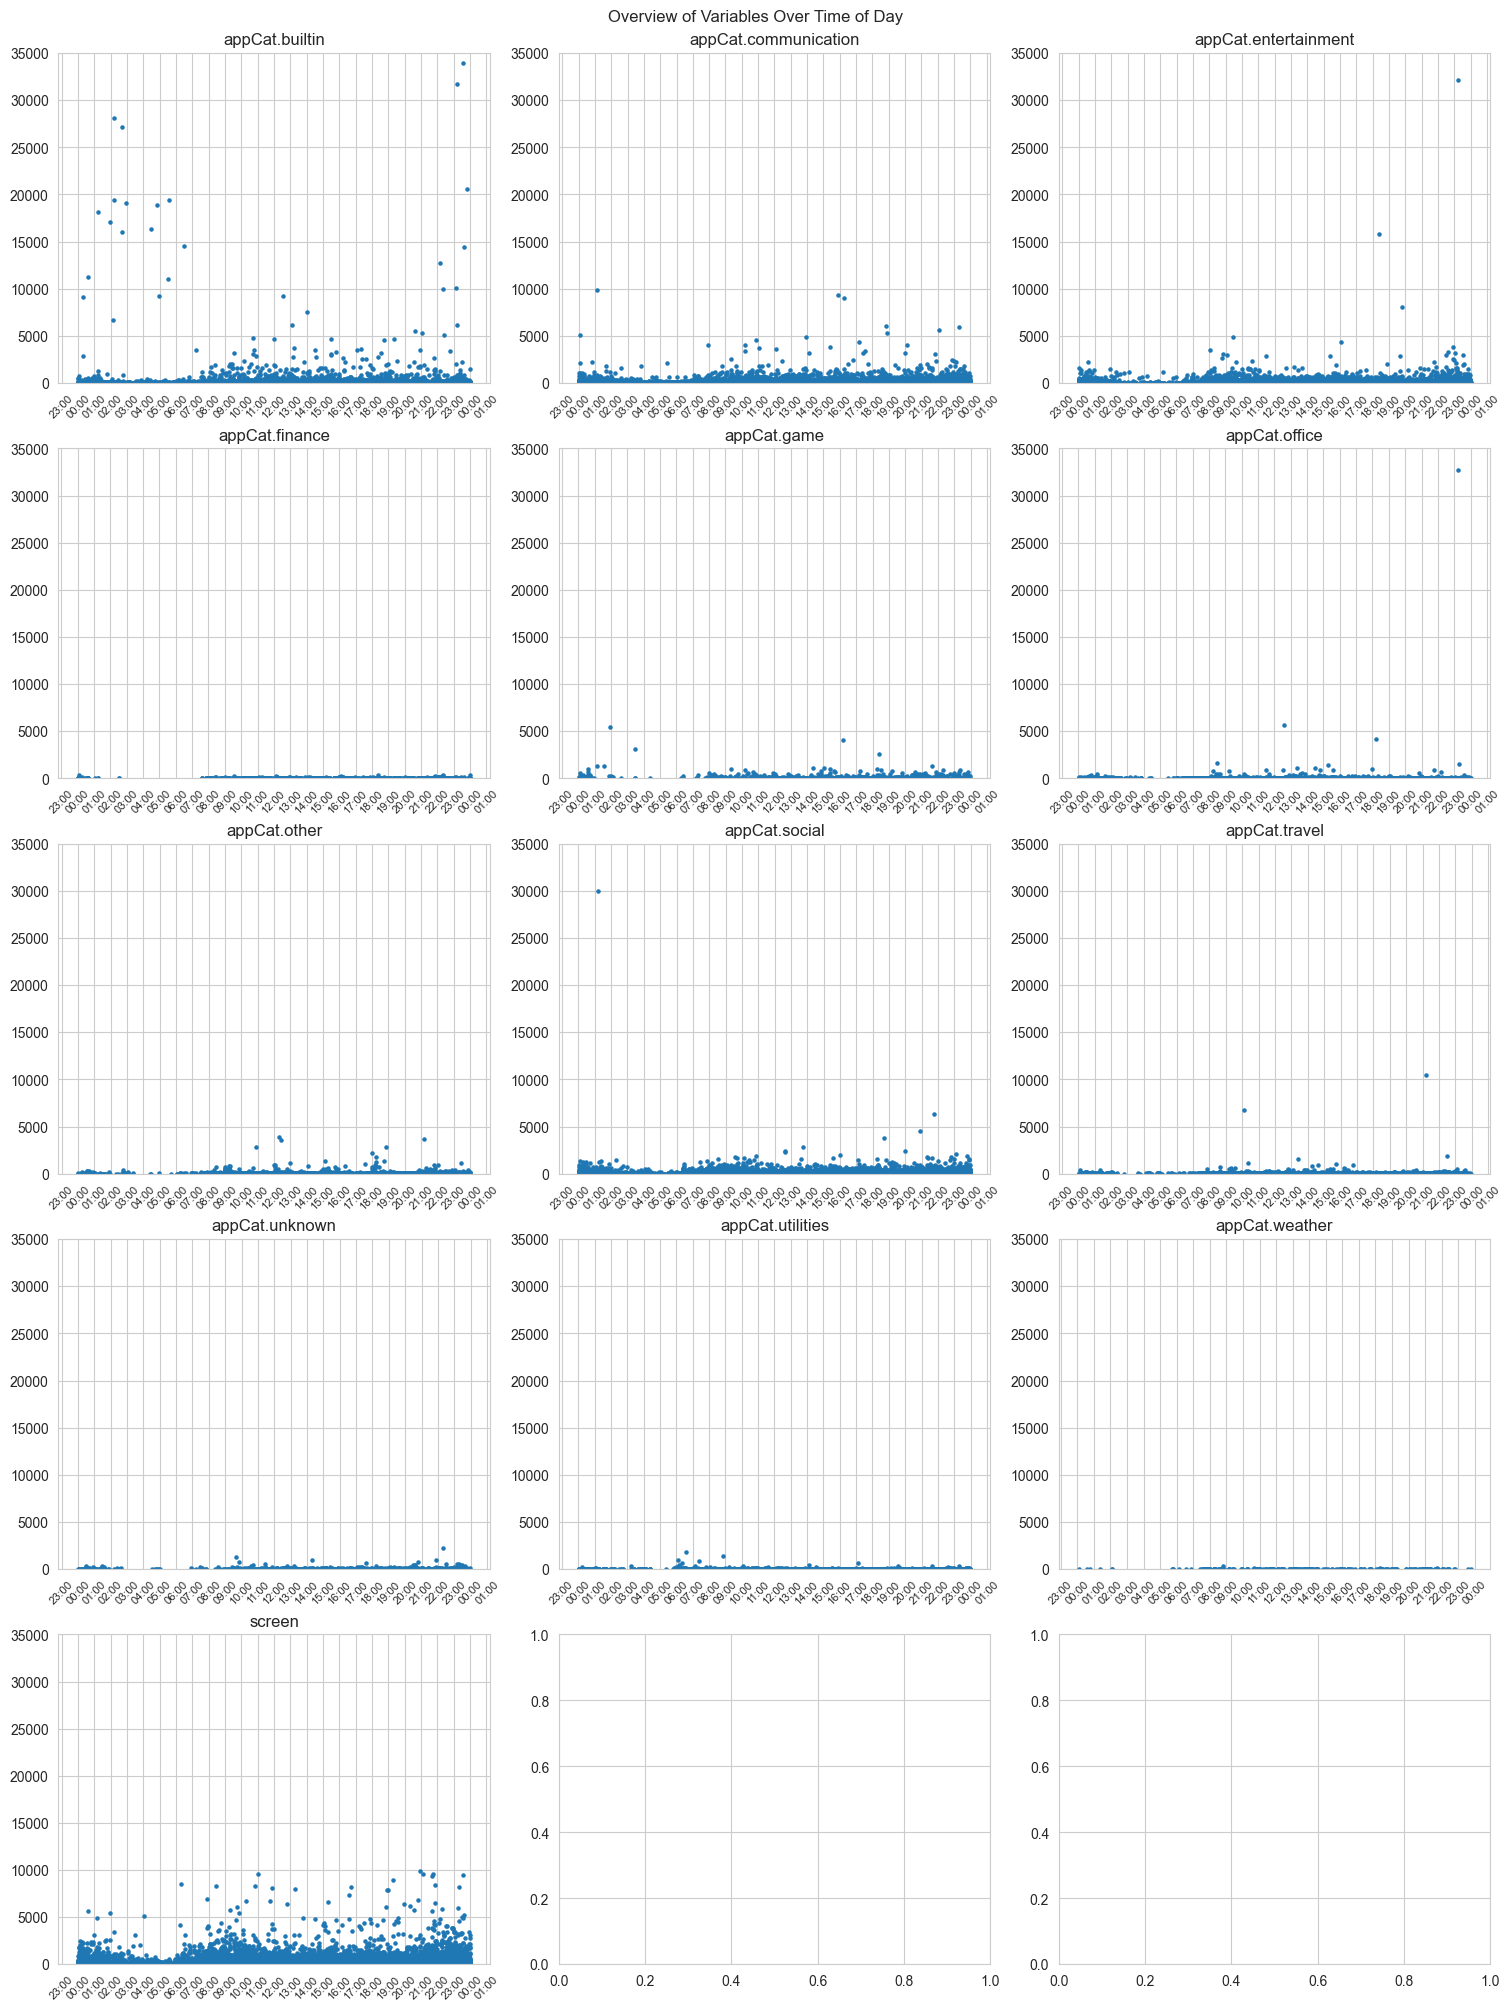

In [24]:
"""
Day plots of the time related variables

Question: How is it possible that the activity in some apps exceed the screentime? Does that mean that the apps are used but not 
"""
# Extract the time component, and set an arbitrary date for all times
df['time_of_day'] = df['time'].apply(lambda x: datetime(1900, 1, 1, x.hour, x.minute, x.second))

non_time_variables = ['mood', 'circumplex.arousal', 'circumplex.valence', 'activity', 'call', 'sms']

def filter_variables(all_var, var_to_remove):
    var_to_keep = []
    for var in all_var:
        if var not in var_to_remove:
            var_to_keep.append(var)
    return var_to_keep

# Extract unique variables
unique_variables = df['variable'].unique()

time_variables = filter_variables(unique_variables, non_time_variables)

n_variables = len(time_variables)

# Determine grid size for subplots
n_cols = 3  # Adjust the number of columns as needed
n_rows = ceil(n_variables / n_cols)  # Calculate rows needed based on the number of variables

# Create a figure and a grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)
fig.suptitle('Overview of Variables Over Time of Day')

# Flatten the axs array for easier iteration if it's multidimensional
axs = axs.flatten()

for i, variable in enumerate(time_variables):
    variable_data = df[df['variable'] == variable]
    # Plot on the ith subplot
    axs[i].scatter(variable_data['time_of_day'], variable_data['value'], s=5)
    axs[i].set_title(variable)
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=1))
    axs[i].tick_params(axis='x', rotation=45, labelsize=8)
    axs[i].set_ylim(0, 35000)


In [25]:
"""
Removing negative time values
376710 data points before removing negative time values
376706 data points after removing negative time values

"""
# Filter the DataFrame
neg_value_filter_time_df = df[(df['variable'].isin(time_variables)) & (df['value'] > 0)]
only_non_time_vars = df[(df['variable'].isin(non_time_variables))]

# Concatenate the filtered and unfiltered parts
df = pd.concat([neg_value_filter_time_df, only_non_time_vars], ignore_index=True)


In [26]:
# """
# Checking whether call and sms have other values than 1.
# And then removing all datapoints with call and sms.
# """
# 
# 
# call_0 = df[(df['variable'] == 'call') & (df['value'] == 0)]
# print(call_0)
# 
# sms_0 = df[(df['variable'] == 'sms') & (df['value'] == 0)]
# print(sms_0)
# 
# df = df[~df['variable'].isin(['call', 'sms'])]
# print(len(df))

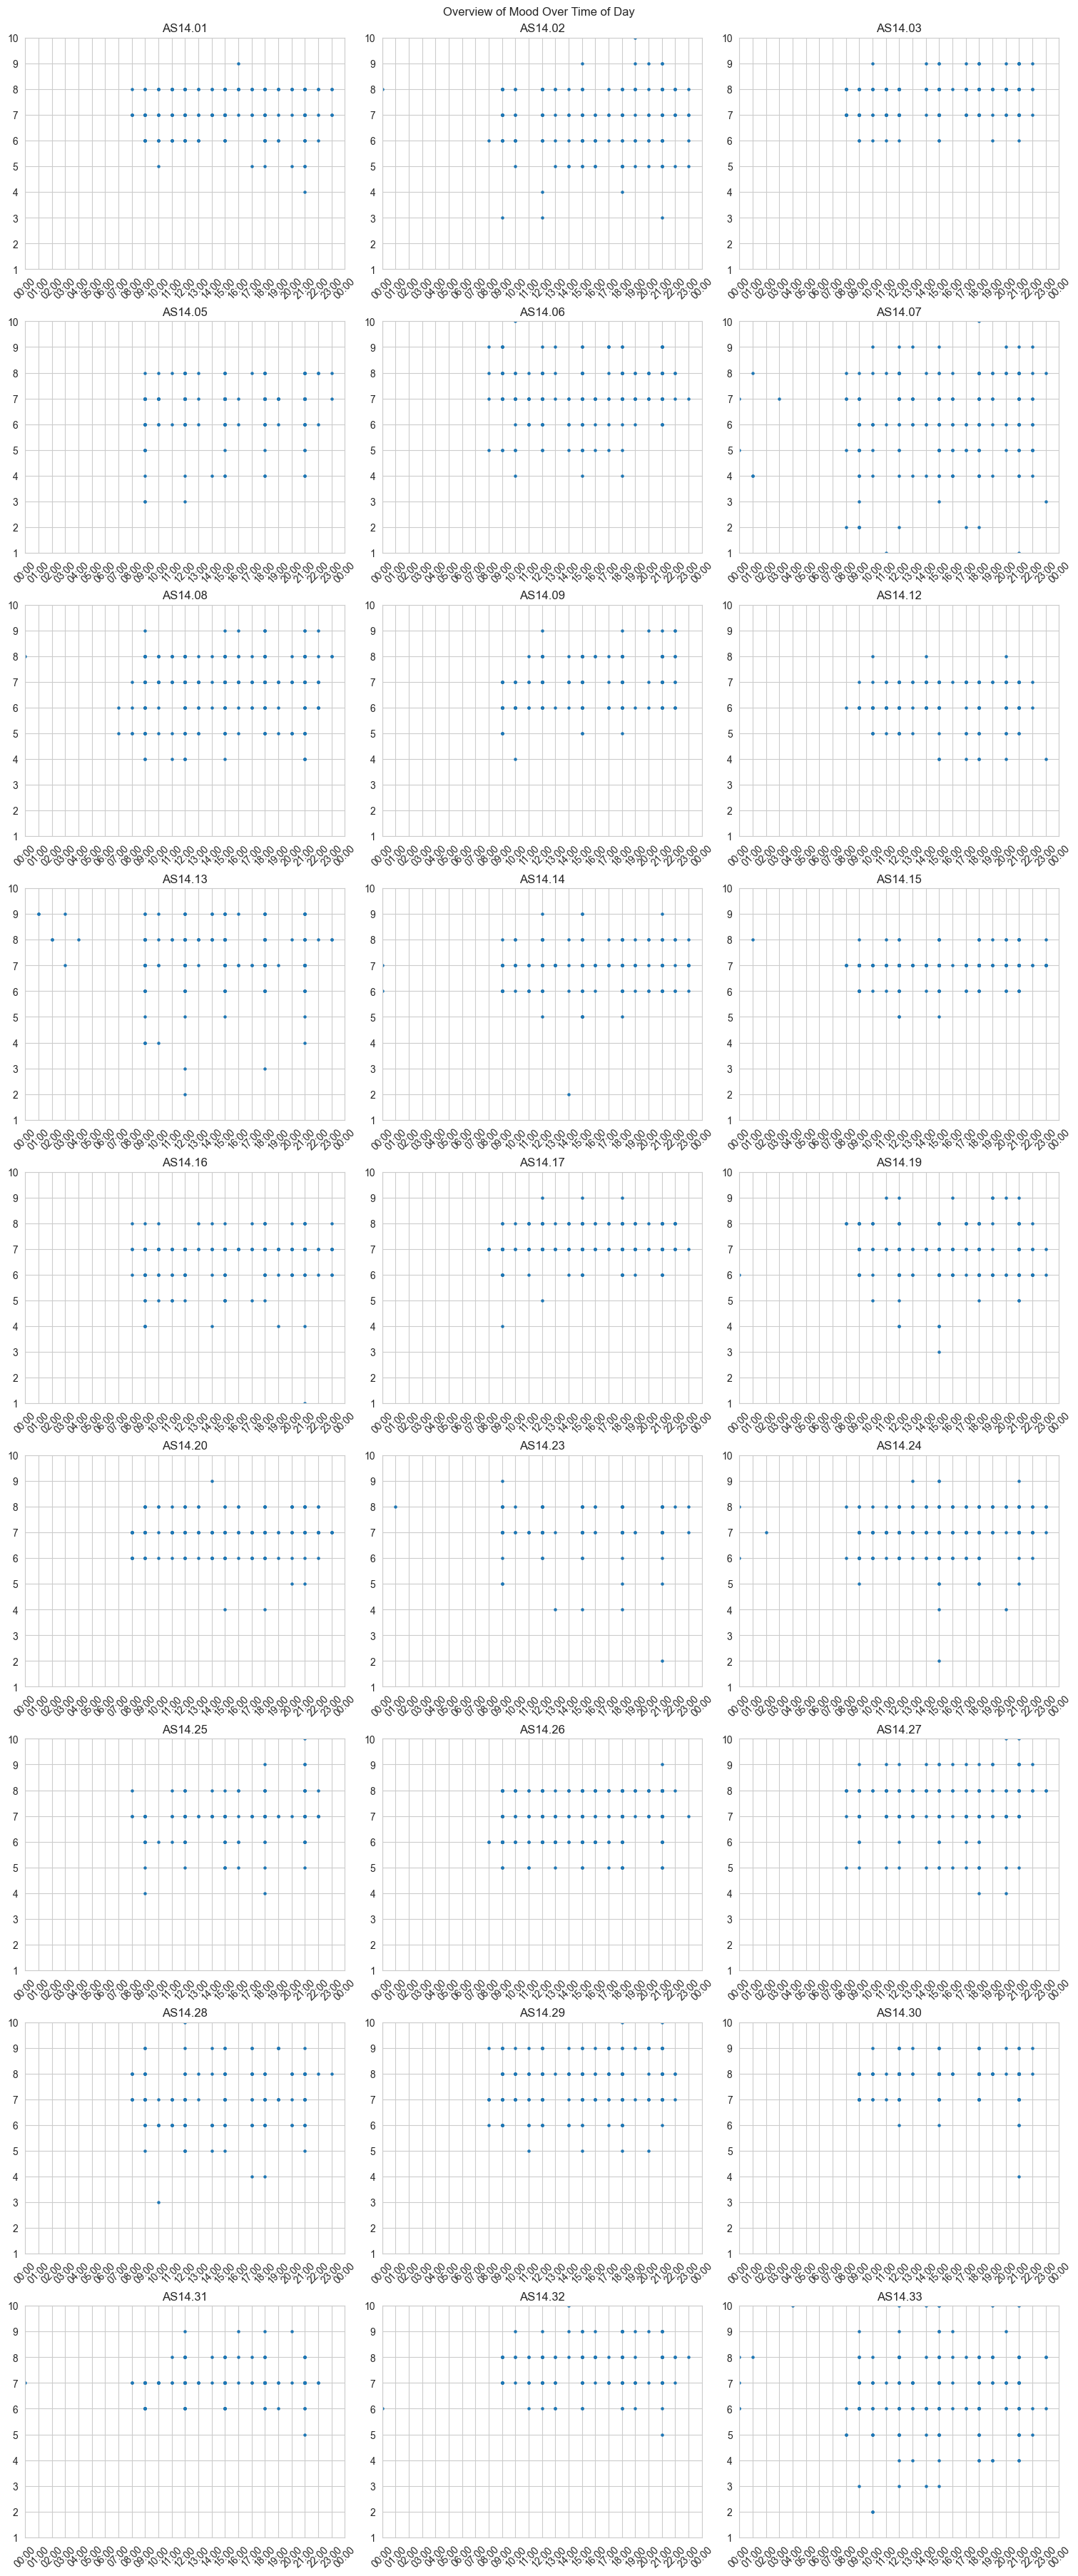

In [27]:

n_participants = len(participants)
n_cols = 3  # Adjust the number of columns as needed
n_rows = ceil(n_participants / n_cols)  # Calculate rows needed based on the number of participants

# Create a figure and a grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4), constrained_layout=True)
fig.suptitle('Overview of Mood Over Time of Day')

# Flatten the axs array for easier iteration if it's multidimensional
axs = axs.flatten()

# Define the full day range for the x-axis
full_day_start = datetime(1900, 1, 1)
full_day_end = datetime(1900, 1, 2)

for i, participant in enumerate(participants):
    participant_df = df[df['id'] == participant]
    variable_data = participant_df[participant_df['variable'] == 'mood']
    
    # Plot on the ith subplot
    axs[i].scatter(variable_data['time_of_day'], variable_data['value'], s=5)
    
    # Set the title for each subplot
    axs[i].set_title(participant)
    
    # Format the x-axis as time
    axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
    axs[i].xaxis.set_major_locator(mdates.HourLocator(interval=1))
    
    # Rotate x-axis labels for readability
    axs[i].tick_params(axis='x', rotation=45)
    
    # Set x-axis to show the full day
    axs[i].set_xlim(full_day_start, full_day_end)
    
    # Set y-axis to range from 1 to 10
    axs[i].set_ylim(1, 10)



In [28]:
"""
DETECTING OUTLIERS

There are datapoints that exceed the total screentime. So I think this means that some apps are running in the background, and that this activity is recorded. 

We have to delete outliers for each participant. Not in general, because in the end we will predict for each participant right?
"""

# Assuming df is your DataFrame with an 'id' column for participant IDs, 
# a 'variable' column for variables, and a 'value' column for the values.

# Create an empty boolean Series to store outlier flags with the same index as df
is_outlier = pd.Series(False, index=df.index)

# Calculate the IQR for each variable for each participant and update the outlier flags
for participant in df['id'].unique():
    for variable in df[df['id'] == participant]['variable'].unique():
        # Subset the DataFrame by participant and variable
        subset = df[(df['id'] == participant) & (df['variable'] == variable)]
        
        # Calculate IQR
        Q1 = subset['value'].quantile(0.25)
        Q3 = subset['value'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR
        
        # Update the is_outlier Series for the current participant and variable
        outliers = (subset['value'] < lower_bound) | (subset['value'] > upper_bound)
        is_outlier[outliers.index] |= outliers

# Filter the DataFrame to exclude outliers
df_filtered = df[~is_outlier]

print(f"Original data points: {len(df)}")
print(f"Data points after removing outliers: {len(df_filtered)}")

df = df_filtered

Original data points: 376706
Data points after removing outliers: 354315


In [29]:
"""
CREATE TIME CATEGORIES WITH COUNTS FOR SMS AND CALL
"""
# Assuming df is your DataFrame and 'time' is a column in this DataFrame
# Ensure the 'time' column is a datetime type
df['time'] = pd.to_datetime(df['time'])

# Function to map the time to the half-hour slot
def map_to_15_min_slot(t):
    # full hour slot, example: 12:00
    if t.minute < 15:
        return t.replace(minute=0, second=0, microsecond=0)
    # Example: 12:15 
    elif t.minute < 30 & t.minute > 15:
        return t.replace(minute=15, second=0, microsecond=0)
    # Example: 12:30
    elif t.minute > 30 & t.minute < 45:
        return t.replace(minute=30, second=0, microsecond=0)
    # Example: 12:45
    else:
        return t.replace(minute=45, second=0, microsecond=0)

# Apply the function to create a new 'time_slot' column for all rows in df
df['time_slot'] = df['time'].apply(map_to_15_min_slot)

# Filter the data for 'call' and 'sms' only
calls_sms = df[df['variable'].isin(['call', 'sms'])]
# print(calls_sms)

# Now group by the date, time_slot, and variable, and count the occurrences
counts = calls_sms.groupby([calls_sms['time'].dt.date, 'time_slot', 'variable']).size().reset_index(name='counts')

# Create 'date' column for merging
df['date'] = df['time'].dt.date
counts['date'] = counts['time_slot'].dt.date
counts = counts.drop(columns=['time'])
print(counts)

# # Merge the counts back into the main dataframe
# df_merged = df.merge(counts, how='left', left_on=['date', 'time_slot', 'variable'], right_on=['date', 'time_slot', 'variable'])
# 
# # Fill NaNs in 'counts' column with zeros if that makes sense for your context
# df_merged['counts'] = df_merged['counts'].fillna(0)
# df = df_merged
# print(df['variable'] == 'call')

# Assuming df is your DataFrame and you want to rename column 'old_name' to 'new_name'
# counts = df.rename(columns={'time_slot': 'time'})


# Now df_merged contains your original data along with a 'counts' column for 'call' and 'sms'

# print(counts)
# print(df)

# I could make a list with all the available times. Then loop over all the existing dates. And add the column with the date and the timeslot if it is non existent in the dataset.

# Add column id
# Replace time_slot for time
# Remove date
# Change the order
# Delete all the call and sms data from the main dataframe.


               time_slot variable  counts        date
0    2014-02-17 07:00:00     call       2  2014-02-17
1    2014-02-17 07:30:00      sms       1  2014-02-17
2    2014-02-17 08:30:00     call       1  2014-02-17
3    2014-02-17 08:30:00      sms       1  2014-02-17
4    2014-02-17 09:00:00      sms       2  2014-02-17
...                  ...      ...     ...         ...
3362 2014-06-06 17:45:00     call       2  2014-06-06
3363 2014-06-06 18:30:00     call       2  2014-06-06
3364 2014-06-06 18:45:00     call       2  2014-06-06
3365 2014-06-07 10:30:00      sms       1  2014-06-07
3366 2014-06-07 11:30:00      sms       1  2014-06-07

[3367 rows x 4 columns]


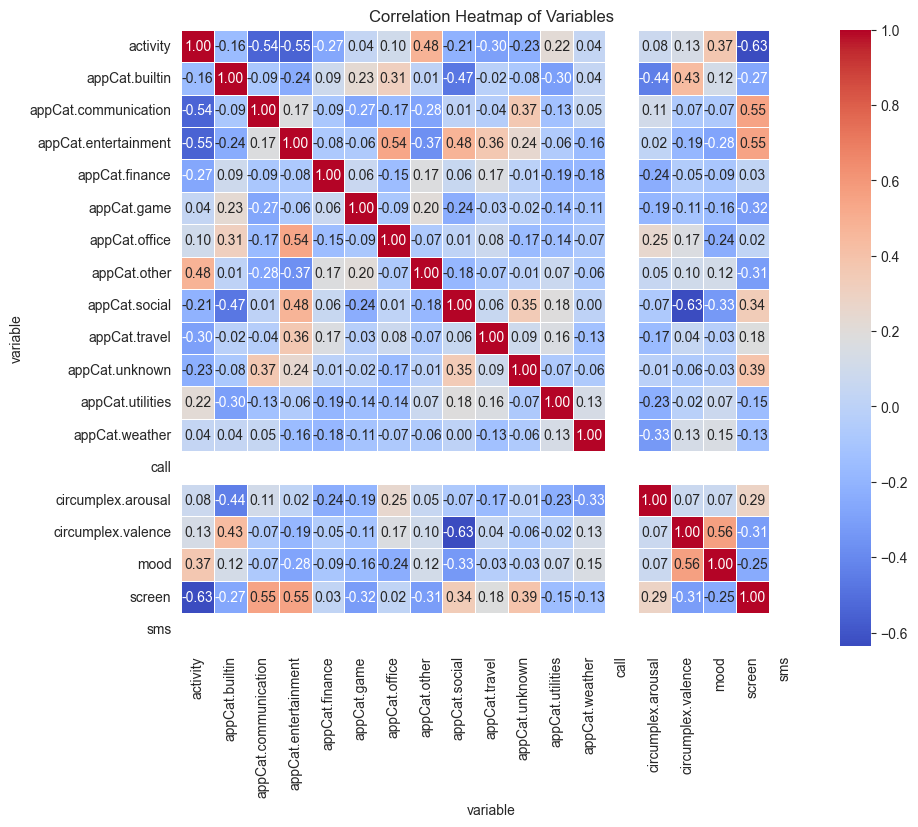

In [30]:
"""
CORRELATIONAL HEATMAP OF ALL VARIABLES
"""
df['hour'] = df['time'].dt.hour
# print(df['hour'])
df['date'] = df['time'].dt.date
# print(df['hour'])
df_pivoted = df.pivot_table(index='date', columns='variable', values='value')
corr_matrix = df_pivoted.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

            date            variable  counts
0     2014-02-17                call      74
1     2014-02-17                 sms      22
2     2014-02-18                call      67
3     2014-02-18                 sms      11
4     2014-02-19                call      80
...          ...                 ...     ...
1529  2014-06-08        appCat.other       2
1530  2014-06-08  circumplex.arousal       2
1531  2014-06-08  circumplex.valence       2
1532  2014-06-08                mood       1
1533  2014-06-08              screen       5

[1534 rows x 3 columns]


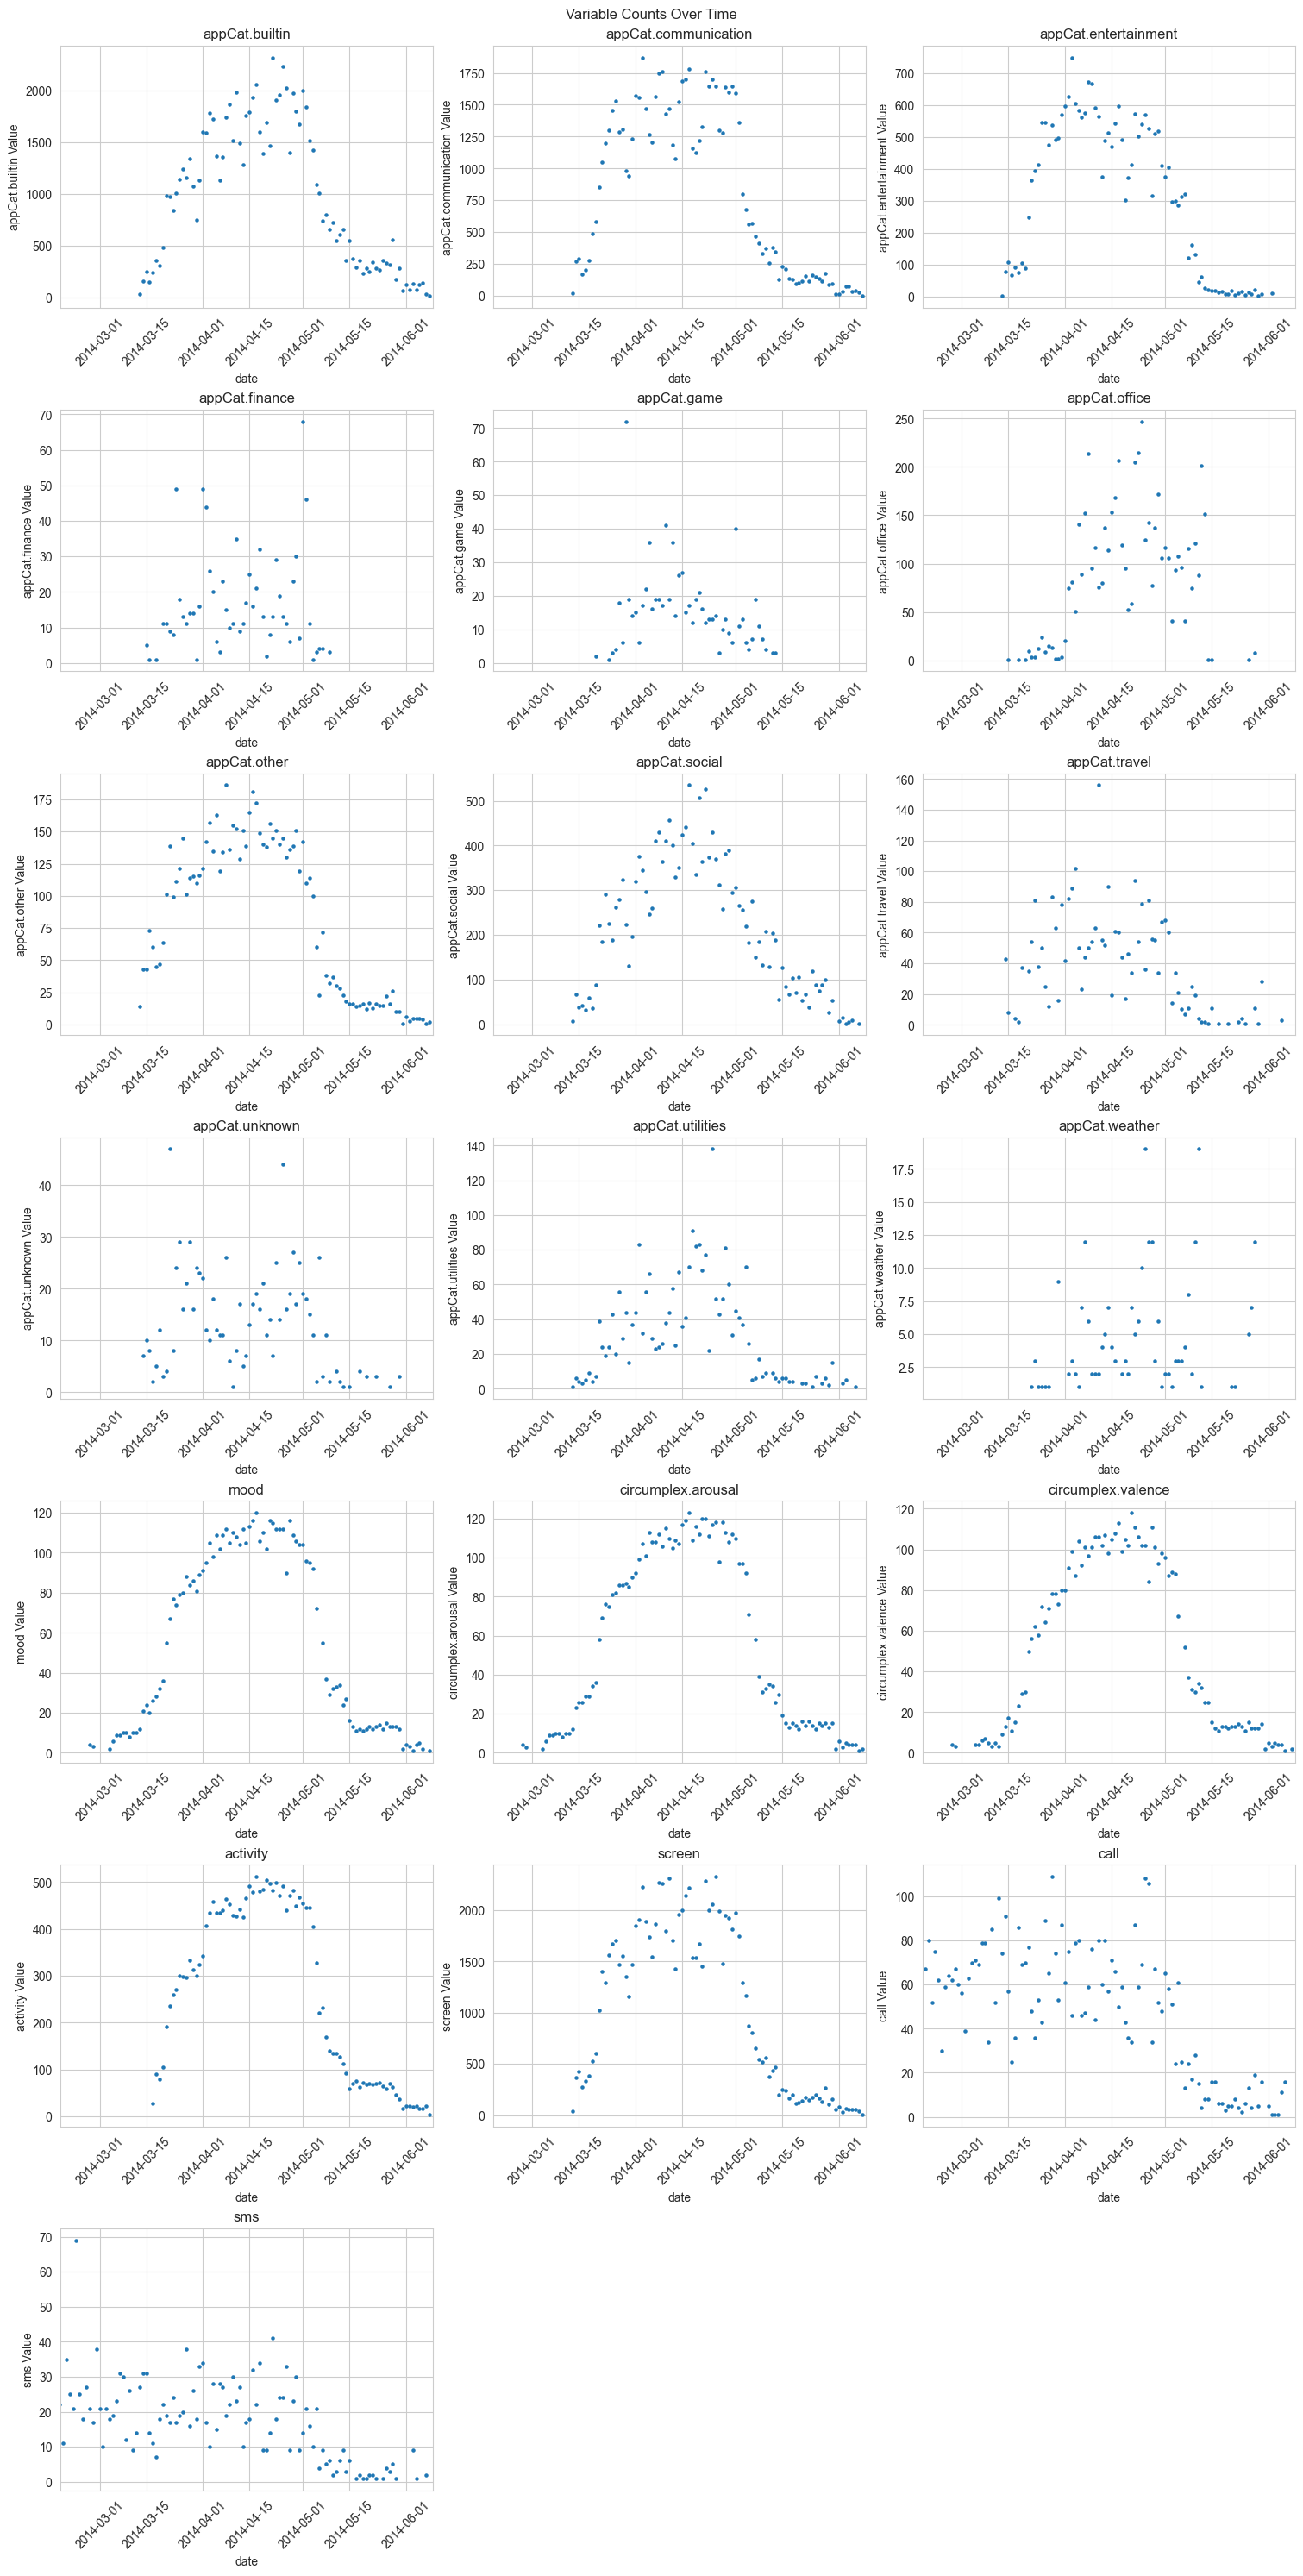

In [31]:
"""
SCATTER PLOTS OF COUNTS OVER DAYS
"""

# Extract the date from the 'time' column
df['date'] = df['time'].dt.date

# Group by date and variable, then count the datapoints
daily_counts = df.groupby(['date', 'variable']).size().reset_index(name='counts')

print(daily_counts)

# Determine the grid size
# n_variables = len(unique_variables)
# n_cols = 3  # for example, adjust as needed
# n_rows = ceil(n_variables / n_cols)

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Variable Counts Over Time')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, variable in enumerate(unique_variables):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current variable
    variable_data = daily_counts[daily_counts['variable'] == variable]
    
    # Plot the data on the current axis
    ax.scatter(variable_data['date'], variable_data['counts'], s=5)
    ax.set_title(variable)
    ax.set_xlabel('date')
    ax.set_ylabel(f'{variable} Value')
    
    ax.set_xlim(global_time_min, global_time_max)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

plt.show()

            date            variable  counts
0     2014-02-17                call      74
1     2014-02-17                 sms      22
2     2014-02-18                call      67
3     2014-02-18                 sms      11
4     2014-02-19                call      80
...          ...                 ...     ...
1529  2014-06-08        appCat.other       2
1530  2014-06-08  circumplex.arousal       2
1531  2014-06-08  circumplex.valence       2
1532  2014-06-08                mood       1
1533  2014-06-08              screen       5

[1534 rows x 3 columns]


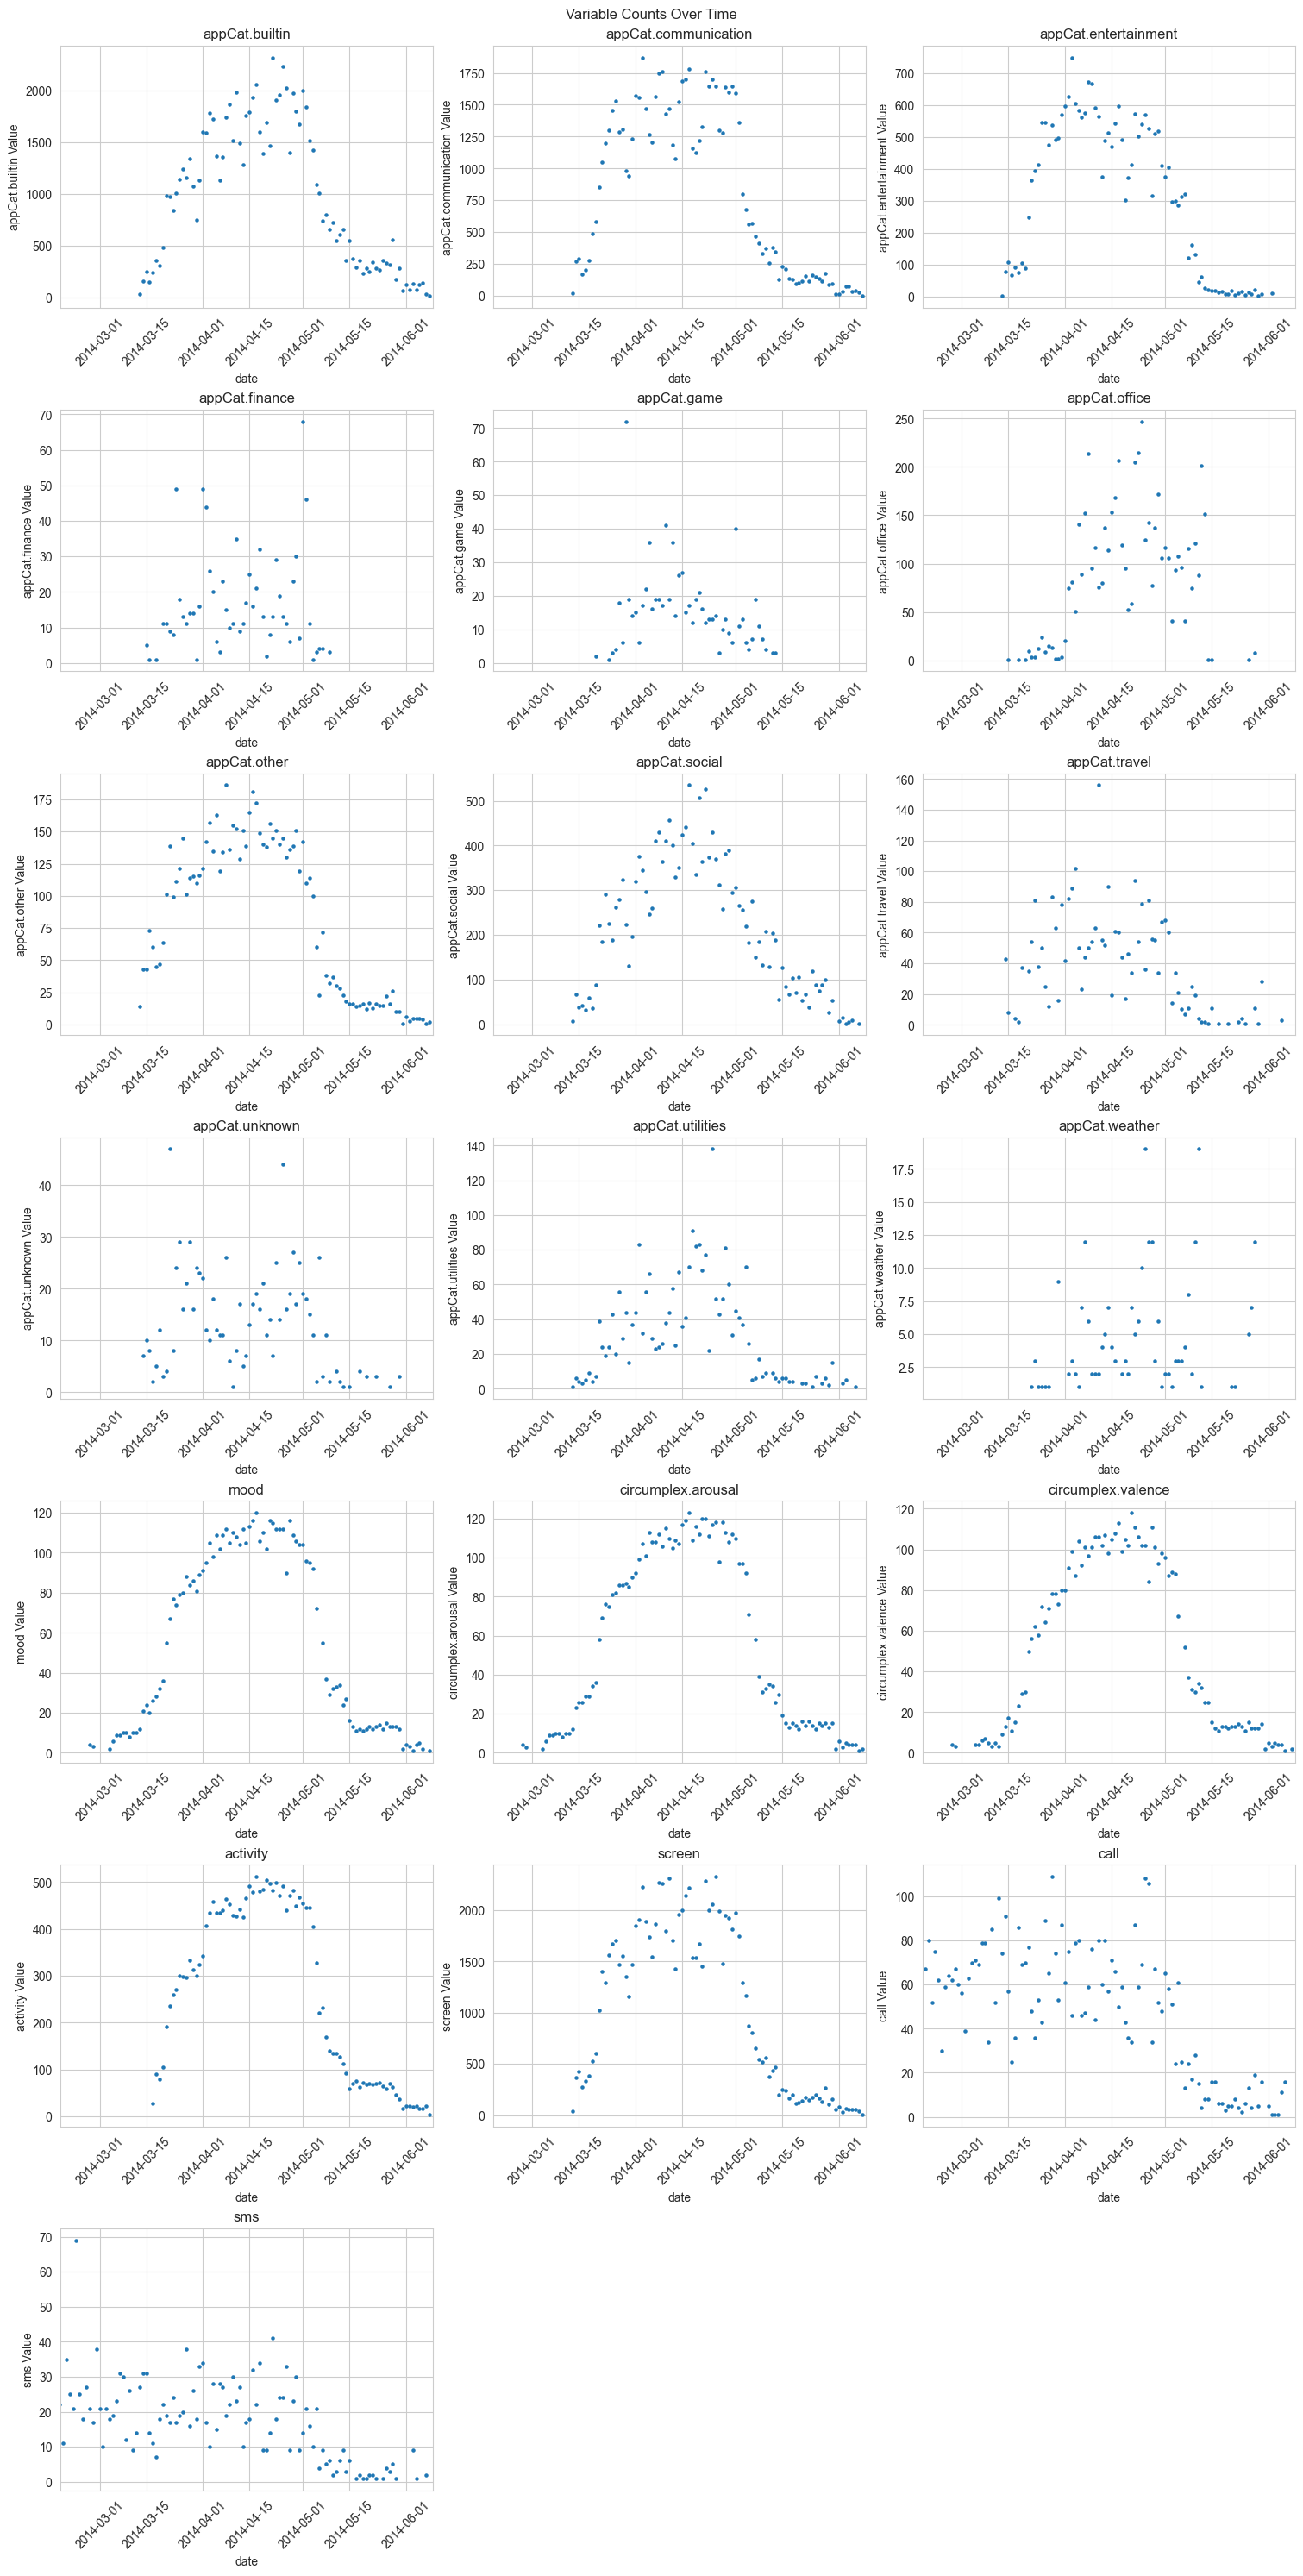

In [32]:
"""
SCATTER PLOTS OF COUNTS OVER DAYS
"""

# Extract the date from the 'time' column
df['HZ'] = df['time'].dt.date

# Group by date and variable, then count the datapoints
daily_counts = df.groupby(['date', 'variable']).size().reset_index(name='counts')

print(daily_counts)

# Determine the grid size
# n_variables = len(unique_variables)
# n_cols = 3  # for example, adjust as needed
# n_rows = ceil(n_variables / n_cols)

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Variable Counts Over Time')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, variable in enumerate(unique_variables):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current variable
    variable_data = daily_counts[daily_counts['variable'] == variable]
    
    # Plot the data on the current axis
    ax.scatter(variable_data['date'], variable_data['counts'], s=5)
    ax.set_title(variable)
    ax.set_xlabel('date')
    ax.set_ylabel(f'{variable} Value')
    
    ax.set_xlim(global_time_min, global_time_max)
    ax.tick_params(axis='x', rotation=45)

# Hide any unused axes
for j in range(i + 1, n_rows * n_cols):
    axs[j].set_visible(False)

plt.show()

In [33]:
"""
Check the first and last date of measurement on each variable for each participant.
Conclusion: people started and stopped on different dates. That is probably the reason why most measurements were done in the middle of the experiment. 
"""
# Group by participant ID and variable, then aggregate to find the first and last date
first_last_dates = df.groupby(['id', 'variable']).agg(
    first_date=('date', 'min'),
    last_date=('date', 'max')
).reset_index()

# Display the results
# print(first_last_dates)

# PIVOT TABLE
df['date'] = df['time'].dt.date

# Group by participant ID and variable, then aggregate to find the first and last date
first_last_dates = df.groupby(['id', 'variable']).agg(
    first_date=('date', 'min'),
    last_date=('date', 'max')
).reset_index()

# Combine the first and last dates into a single string or tuple
first_last_dates['date_range'] = first_last_dates.apply(lambda x: f"{x['first_date']} to {x['last_date']}", axis=1)

# Now pivot the table so participants are rows, variables are columns, and values are the date ranges
pivot_table = first_last_dates.pivot(index='id', columns='variable', values='date_range')

# Display the resulting pivot table
print(pivot_table)

variable                  activity            appCat.builtin  \
id                                                             
AS14.01   2014-03-20 to 2014-05-05  2014-03-20 to 2014-05-05   
AS14.02   2014-03-17 to 2014-04-24  2014-03-14 to 2014-04-19   
AS14.03   2014-03-22 to 2014-05-08  2014-03-21 to 2014-05-07   
AS14.05   2014-03-17 to 2014-05-05  2014-03-14 to 2014-05-04   
AS14.06   2014-03-24 to 2014-05-08  2014-03-24 to 2014-05-07   
AS14.07   2014-03-25 to 2014-05-04  2014-03-18 to 2014-05-04   
AS14.08   2014-03-17 to 2014-05-05  2014-03-13 to 2014-05-04   
AS14.09   2014-03-22 to 2014-04-26  2014-03-21 to 2014-04-26   
AS14.12   2014-03-27 to 2014-05-05  2014-03-27 to 2014-05-05   
AS14.13   2014-03-20 to 2014-05-02  2014-03-13 to 2014-05-03   
AS14.14   2014-03-21 to 2014-05-05  2014-03-21 to 2014-05-05   
AS14.15   2014-03-17 to 2014-05-07  2014-03-14 to 2014-05-06   
AS14.16   2014-03-17 to 2014-05-05  2014-03-13 to 2014-05-05   
AS14.17   2014-03-20 to 2014-05-05  2014

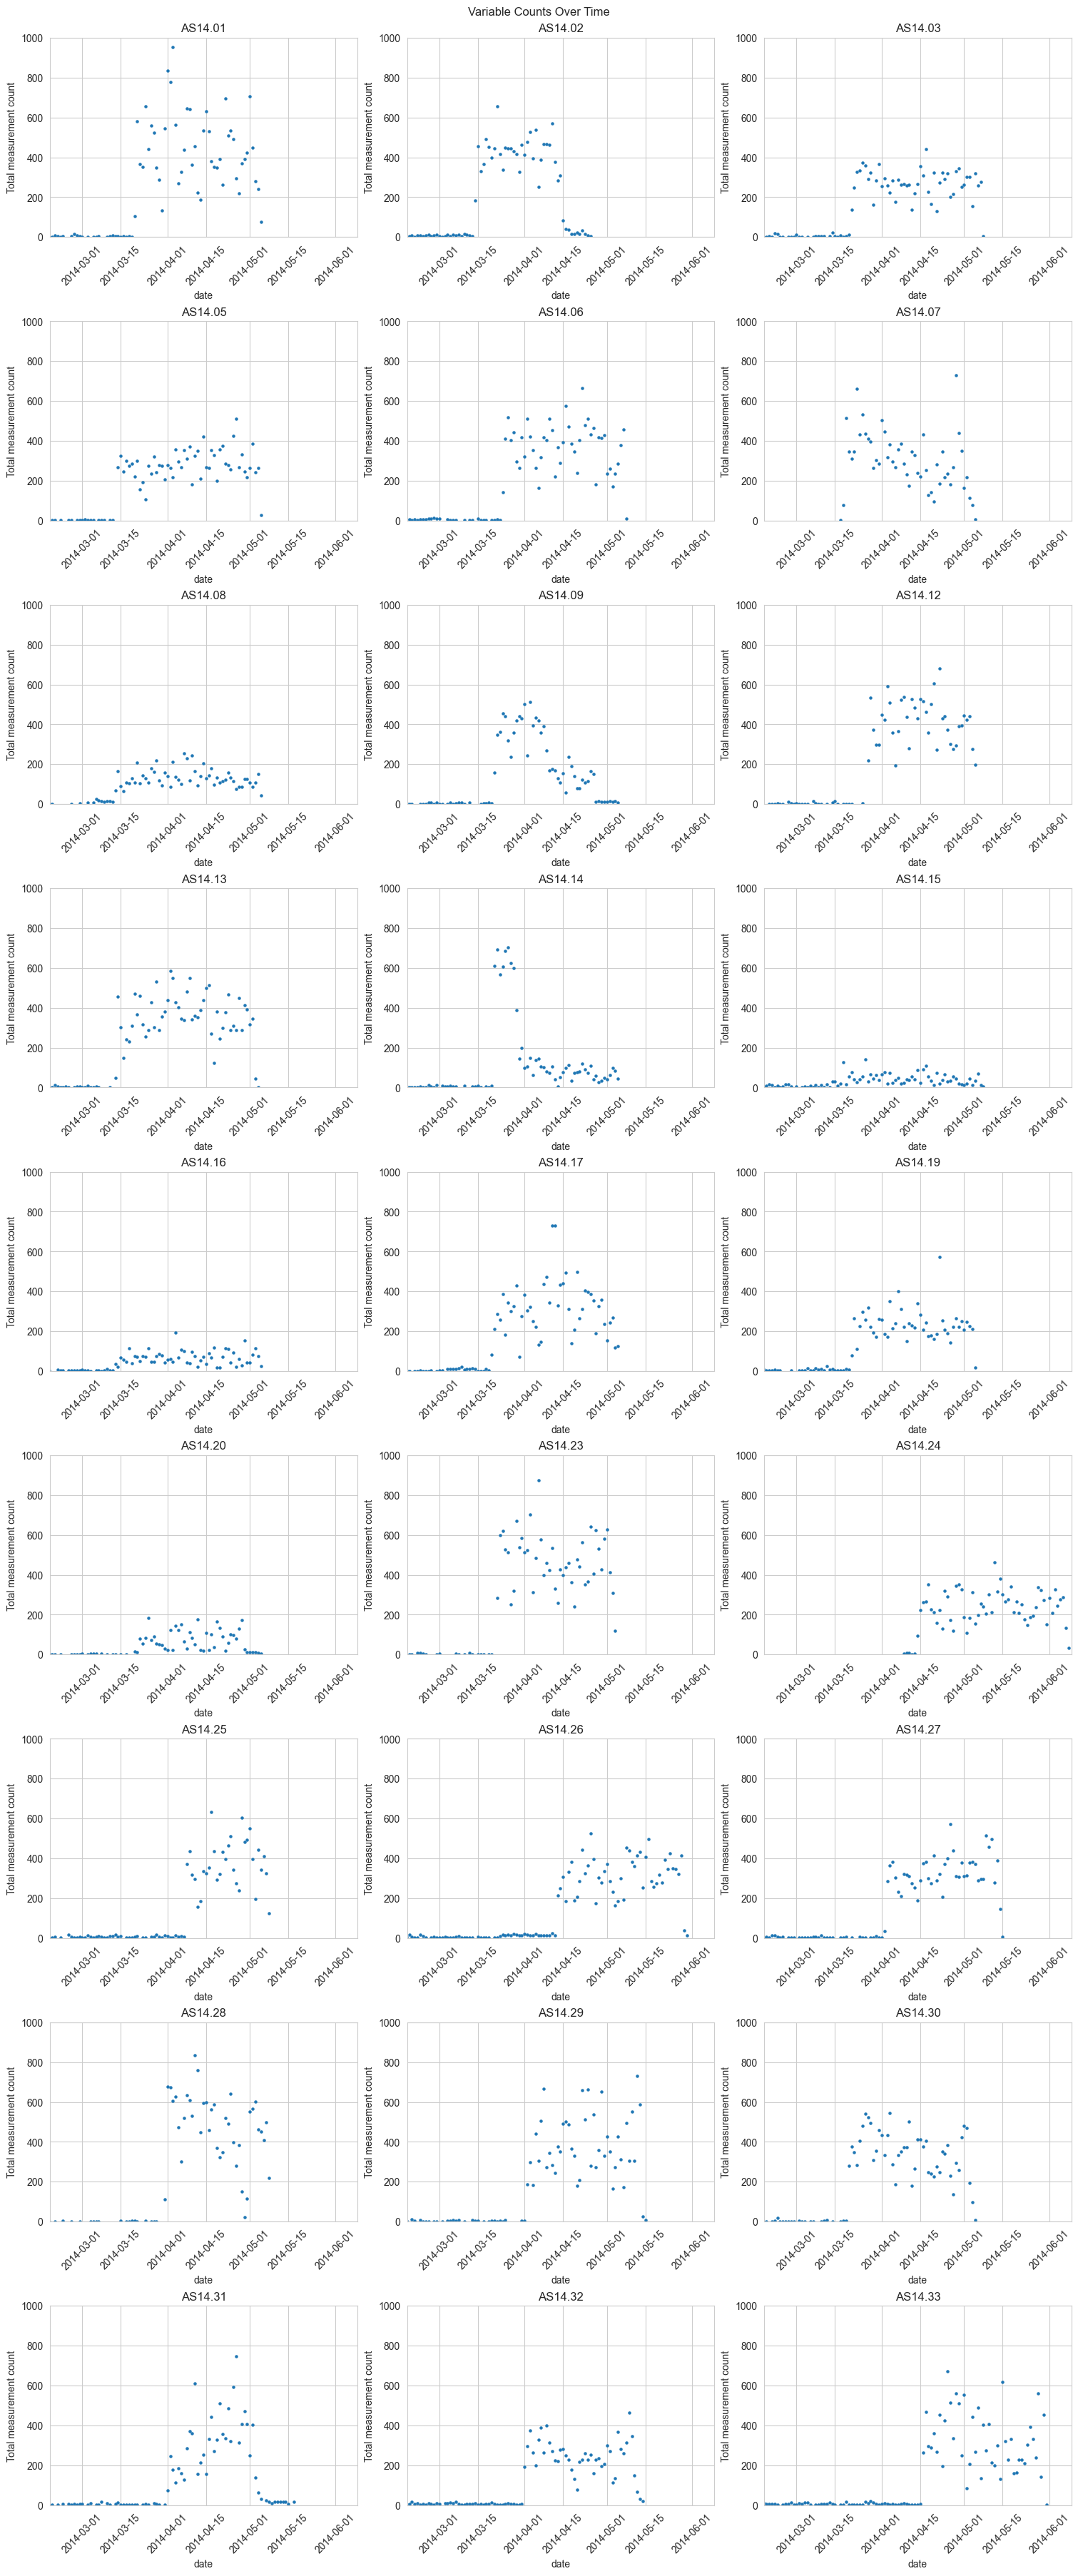

In [34]:
"""
SCATTER PLOTS OF ALL MEASUREMENT COUNTS OVER DAYS FOR EACH PARTICIPANT
"""

# Extract the date from the 'time' column
df['date'] = df['time'].dt.date

# Group by date and variable, then count the datapoints
daily_counts = df.groupby(['date', 'id']).size().reset_index(name='counts')

# print(daily_counts)

# Determine the grid size
# n_variables = len(unique_variables)
# n_cols = 3  # for example, adjust as needed
# n_rows = ceil(n_variables / n_cols)

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Variable Counts Over Time')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, participant in enumerate(participants):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current variable
    variable_data = daily_counts[daily_counts['id'] == participant]
    
    # Plot the data on the current axis
    ax.scatter(variable_data['date'], variable_data['counts'], s=5)
    ax.set_title(participant)
    ax.set_xlabel('date')
    ax.set_ylabel(f'Total measurement count')
    
    ax.set_xlim(global_time_min, global_time_max)
    ax.tick_params(axis='x', rotation=45)
    axs[i].set_ylim(0, 1000)

# # Hide any unused axes
# for j in range(i + 1, n_rows * n_cols):
#     axs[j].set_visible(False)


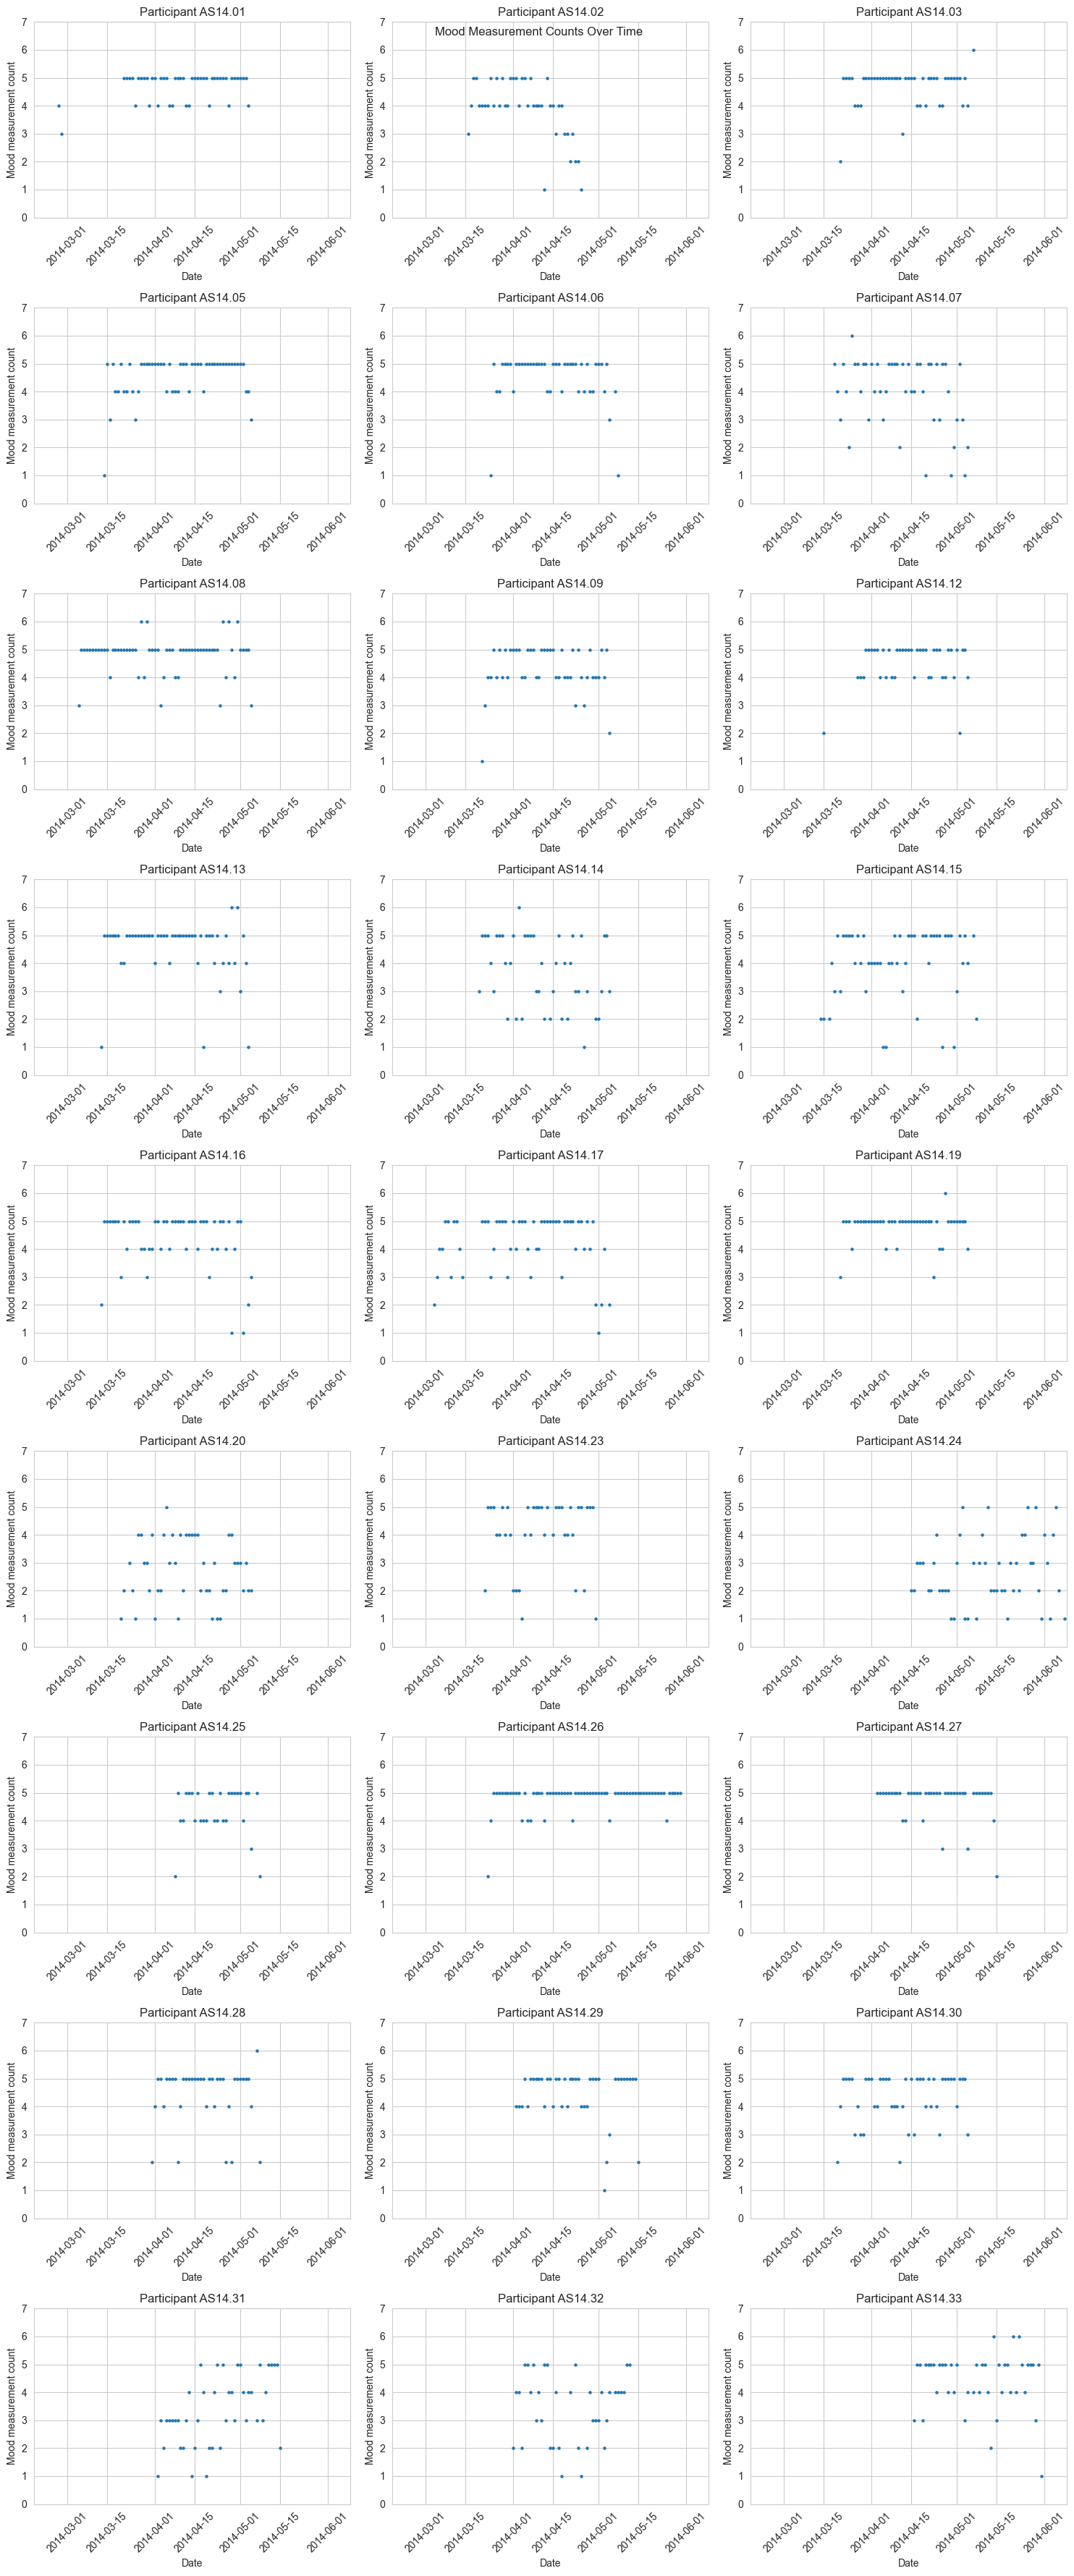

In [35]:
"""
MOOD COUNTS OVER DAYS FOR EACH PARTICIPANT
These scatterplots reveal that the distribution of mood measurements is approximately the same over the days that they participated in the experiment. 
"""

# Assuming df is your DataFrame and it already contains 'time' as datetime
# If not, convert 'time' to datetime:
# df['time'] = pd.to_datetime(df['time'])

# Extract the date from the 'time' column
# df['date'] = df['time'].dt.date

# Filter the DataFrame for only 'mood' measurements
mood_measurements = df[df['variable'] == 'mood']

# Group by date and participant ID, then count the datapoints for 'mood'
daily_mood_counts = mood_measurements.groupby(['date', 'id']).size().reset_index(name='counts')

# Get a list of unique participant IDs
participants = mood_measurements['id'].unique()

# Determine the grid size based on the number of participants
n_participants = len(participants)
n_cols = 3  # Adjust the number of columns as needed
n_rows = ceil(n_participants / n_cols)  # Calculate rows needed based on the number of participants

# Create a single figure and an array of axes (subplots)
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4), constrained_layout=True)
fig.suptitle('Mood Measurement Counts Over Time')

# Flatten the array of axes for easy iterating
axs = axs.flatten()

for i, participant in enumerate(participants):
    # Select the current axis
    ax = axs[i]
    
    # Filter the data for the current participant
    participant_data = daily_mood_counts[daily_mood_counts['id'] == participant]
    
    # Plot the data on the current axis
    ax.scatter(participant_data['date'], participant_data['counts'], s=5)
    ax.set_title(f'Participant {participant}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Mood measurement count')

    # Optionally, set x-axis limits if you have a specific date range in mind
    # ax.set_xlim(pd.Timestamp('YYYY-MM-DD'), pd.Timestamp('YYYY-MM-DD'))
    ax.set_xlim(global_time_min, global_time_max)
    ax.tick_params(axis='x', rotation=45)
    axs[i].set_ylim(0, 7)


plt.tight_layout()
plt.show()


In [36]:
"""
For each participant, delete all the data for which there are no mood measurements. 
"""

df['date'] = df['time'].dt.date

# First, identify all dates per participant with a mood measurement
mood_dates = df[df['variable'] == 'mood'][['id', 'date']].drop_duplicates()

# Merge the original df with mood_dates to filter rows
# Only keep rows where the participant-date combination has a mood measurement
df_filtered = pd.merge(df, mood_dates, on=['id', 'date'], how='inner')

print(len(df))
print(len(df_filtered))

354315
342755
